# Uniaxial Materials

The `UniaxialMaterial` object has the following methods:

> ```python
> setTrialStrain(strain: float) -> float
> getStress(strain: float = None, commit: bool =False) -> float
> ```


In [1]:
from opensees import uniaxial
from opensees.units.english import ksi, psi, inch, ft, MPa

import numpy as np
from numpy import sin, linspace, pi, sqrt

import matplotlib.pyplot as plt
try:
    # Try loading a plotting style that may not be installed
    plt.style.use("typewriter")
except:
    pass

## Plasticity

In [2]:
Fy  = 66.8*ksi             # steel yield stress
Es  = 29000.*ksi           # modulus of steel

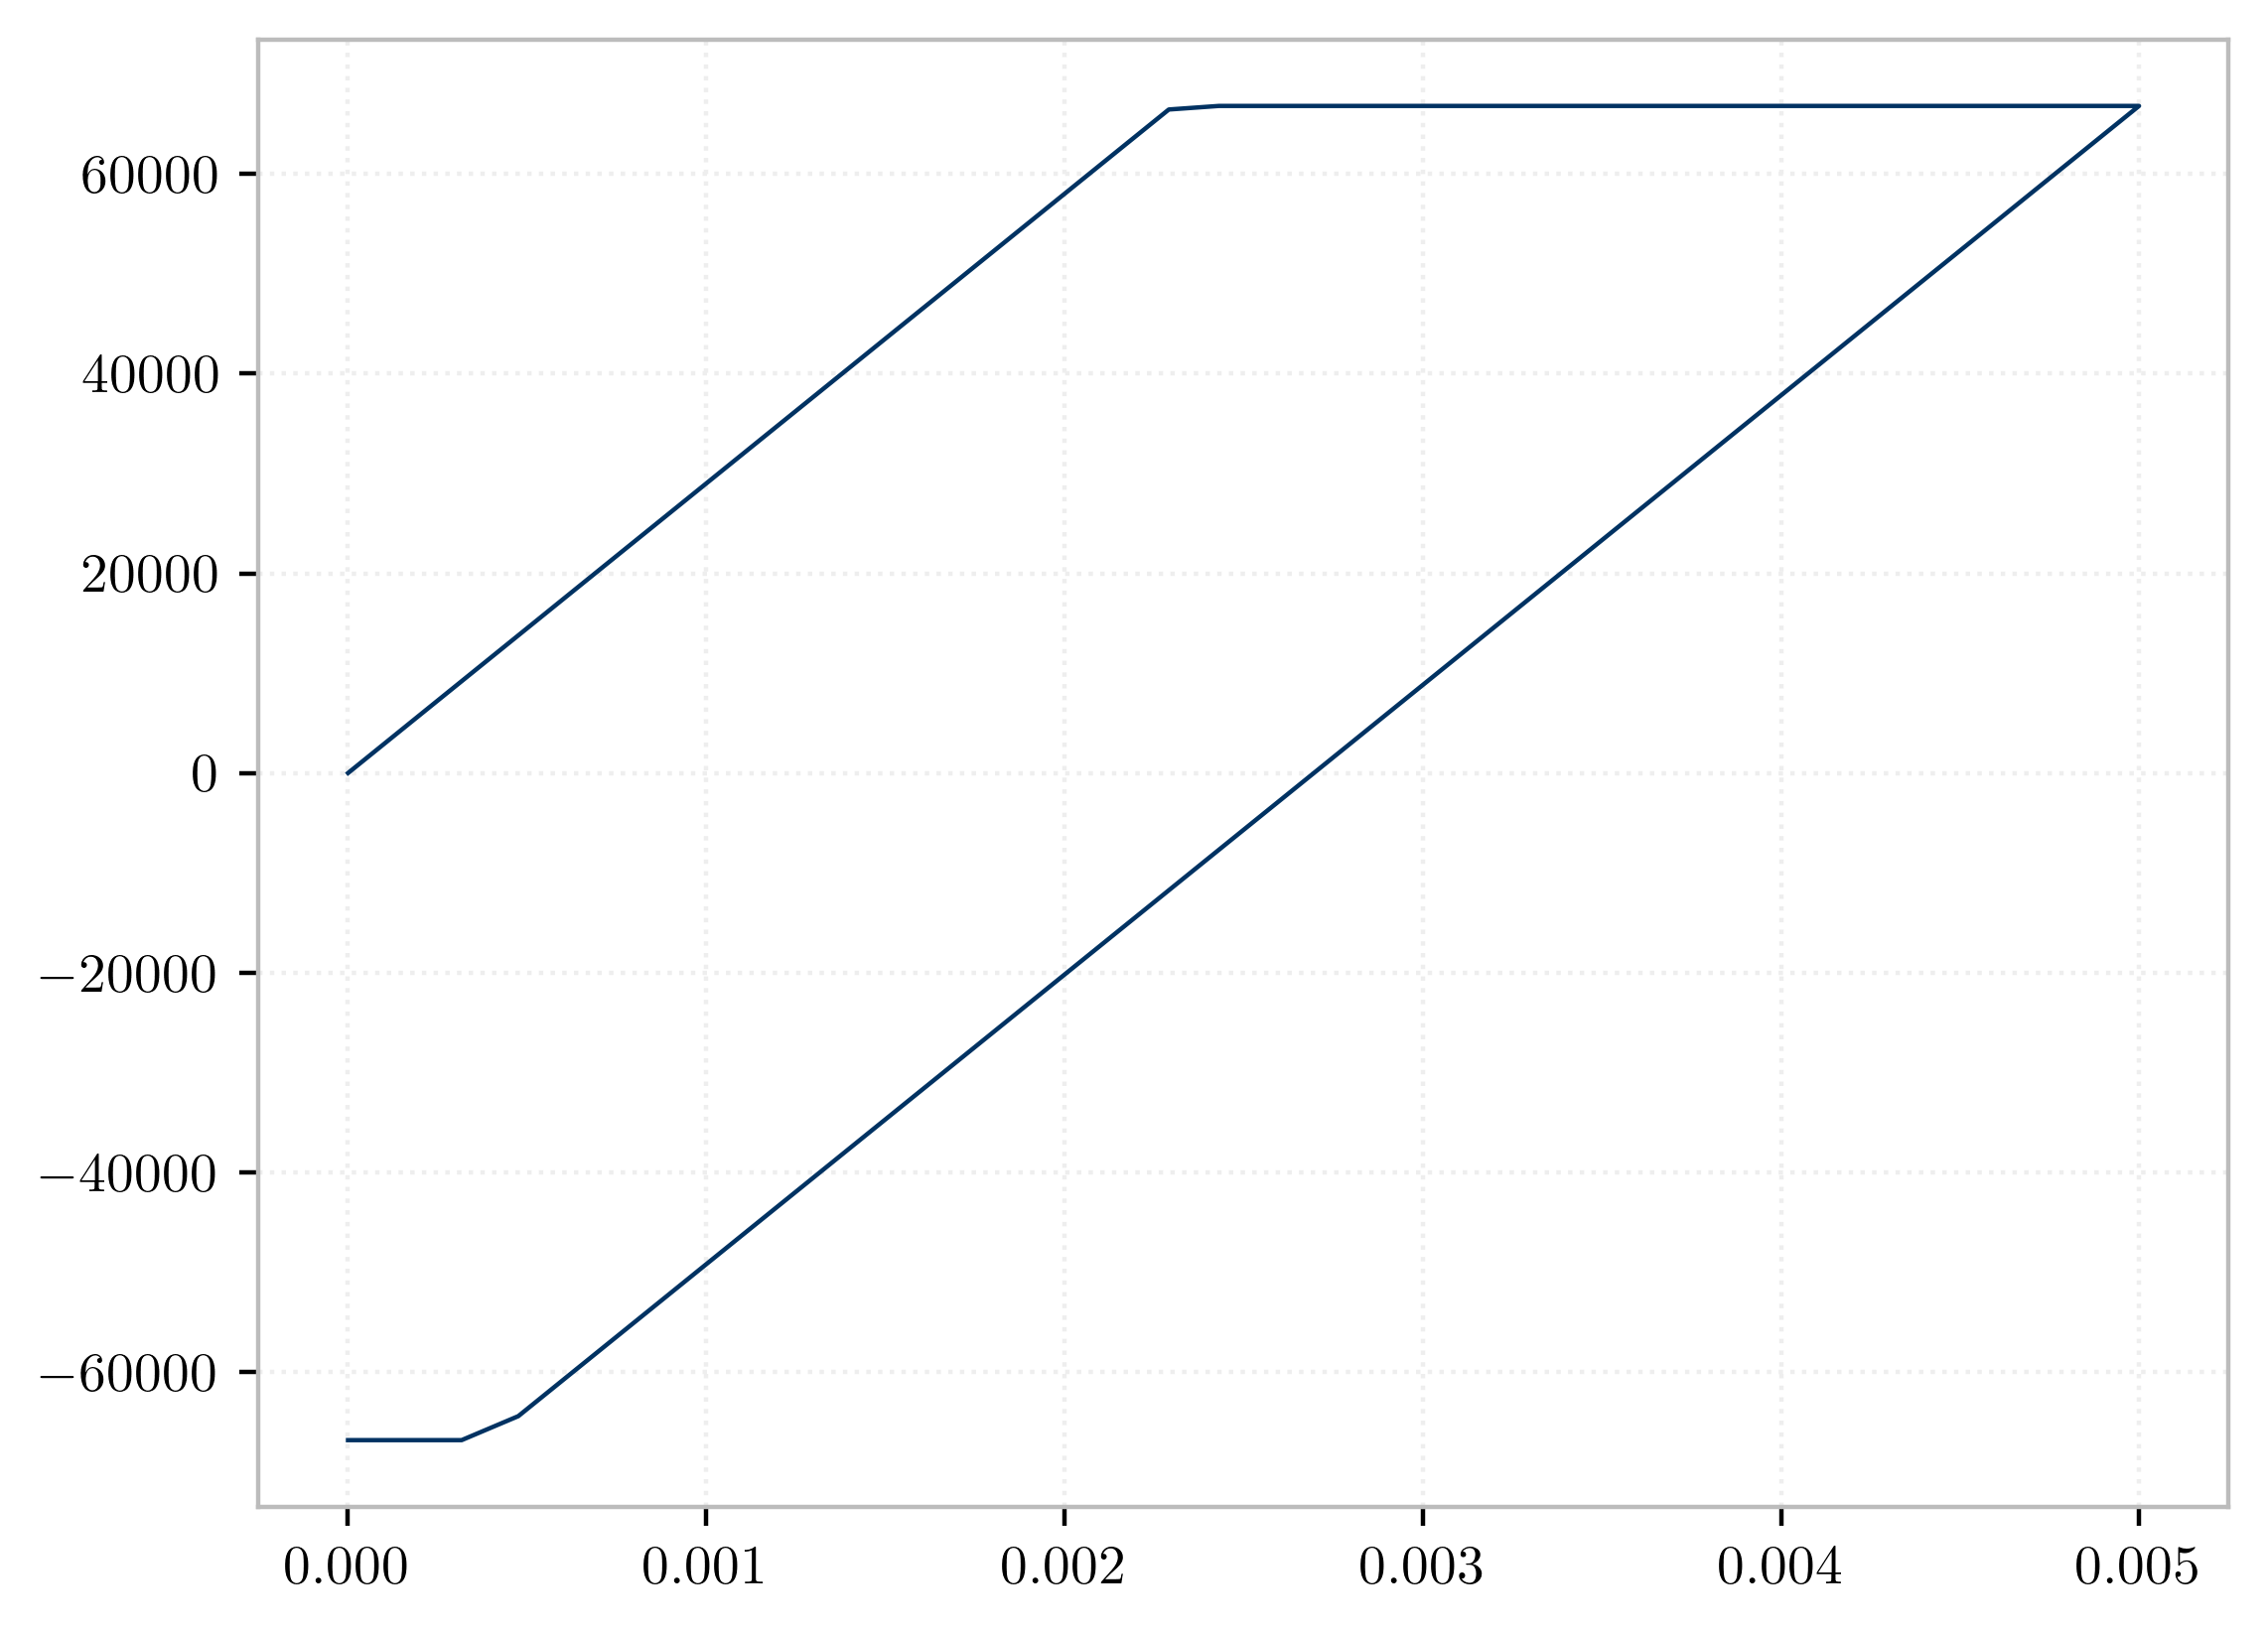

In [3]:
elastic_pp_material = uniaxial.ElasticPP(Es, Fy/Es)

strain = 0.005*sin(linspace(0, 1.0*pi, 100))


with elastic_pp_material as mat:

    stress_list = []
    for e in strain[:50] :
        stress_list.append(mat.getStress(e, commit=True))
        
    for e in strain[50:] :
        stress_list.append(mat.getStress(e, commit=False))

# create a plotting figure
fig, ax = plt.subplots()    
ax.plot(strain, stress_list, label="ElasticPP");

ElasticPPMaterial::ElasticPPMaterial() - eyn > 0, setting < 0


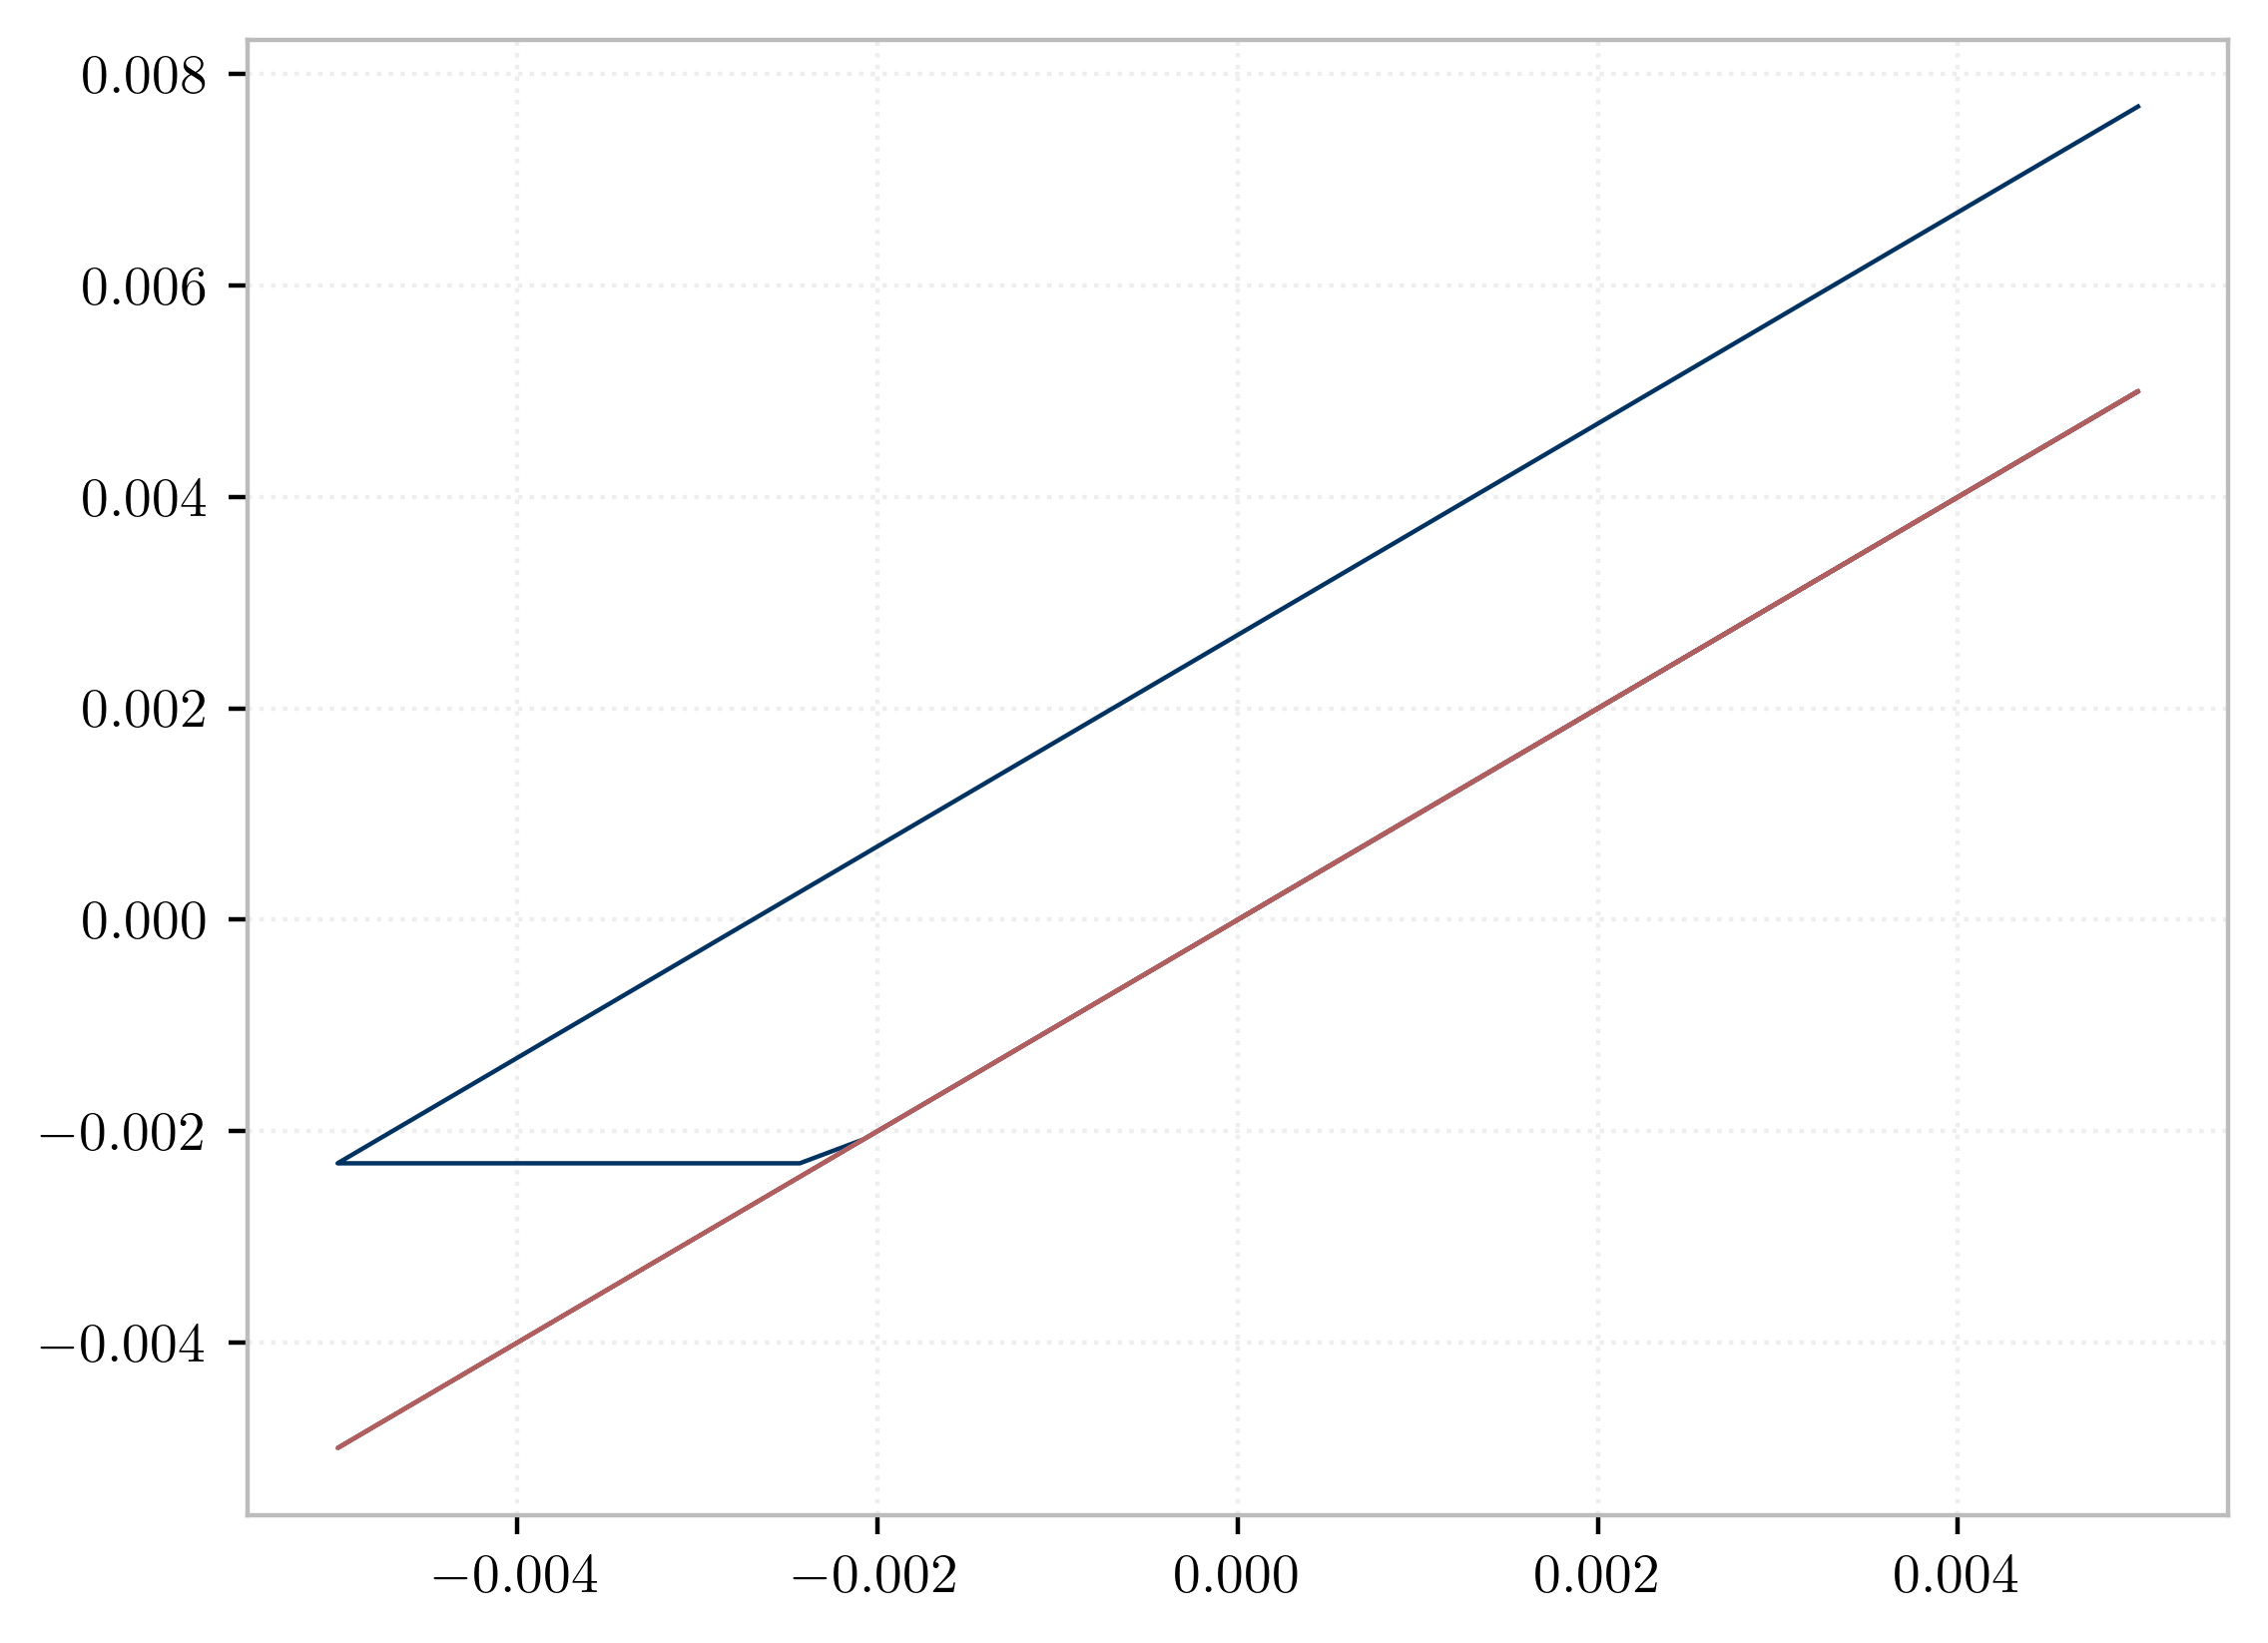

In [4]:
fig, ax = plt.subplots()

strain = 0.005*sin(linspace(0, 2.5*pi, 100))

with uniaxial.ElasticPP(1, Es, Fy/Es) as mat:
    stress = [mat.getStress(e, commit=True) for e in strain]
    ax.plot(strain, stress, label="ElasticPP")

with uniaxial.Hardening(1, Es, Fy, 0.0*Es, 0.1*Es) as mat:
    ax.plot(strain, [mat.getStress(e, commit=True) for e in strain], label="Hardening")


## Reinforcing Steel

The following features are typically desired of a reinforcing steel model:

- Bauschinger effect
- Low-cycle fatigue
- Buckling
- Hardening

In [5]:
Bs  = 0.005                # strain-hardening ratio 
R0  = 18                   # control the transition from elastic to plastic branches
cR1 = 0.925                # "
cR2 = 0.15                 # "

In [6]:
tangent = []

#                     no tag needed
steel = uniaxial.Steel02(Fy, Es, 0.05, R0=R0)


strain = 0.005*sin(linspace(0, 2.5*pi, 100))


with steel as mat:
    for e in strain:
        mat.setTrialStrain(e)
        Et = mat.getTangent()
        tangent.append(Et)
        mat.commitState()

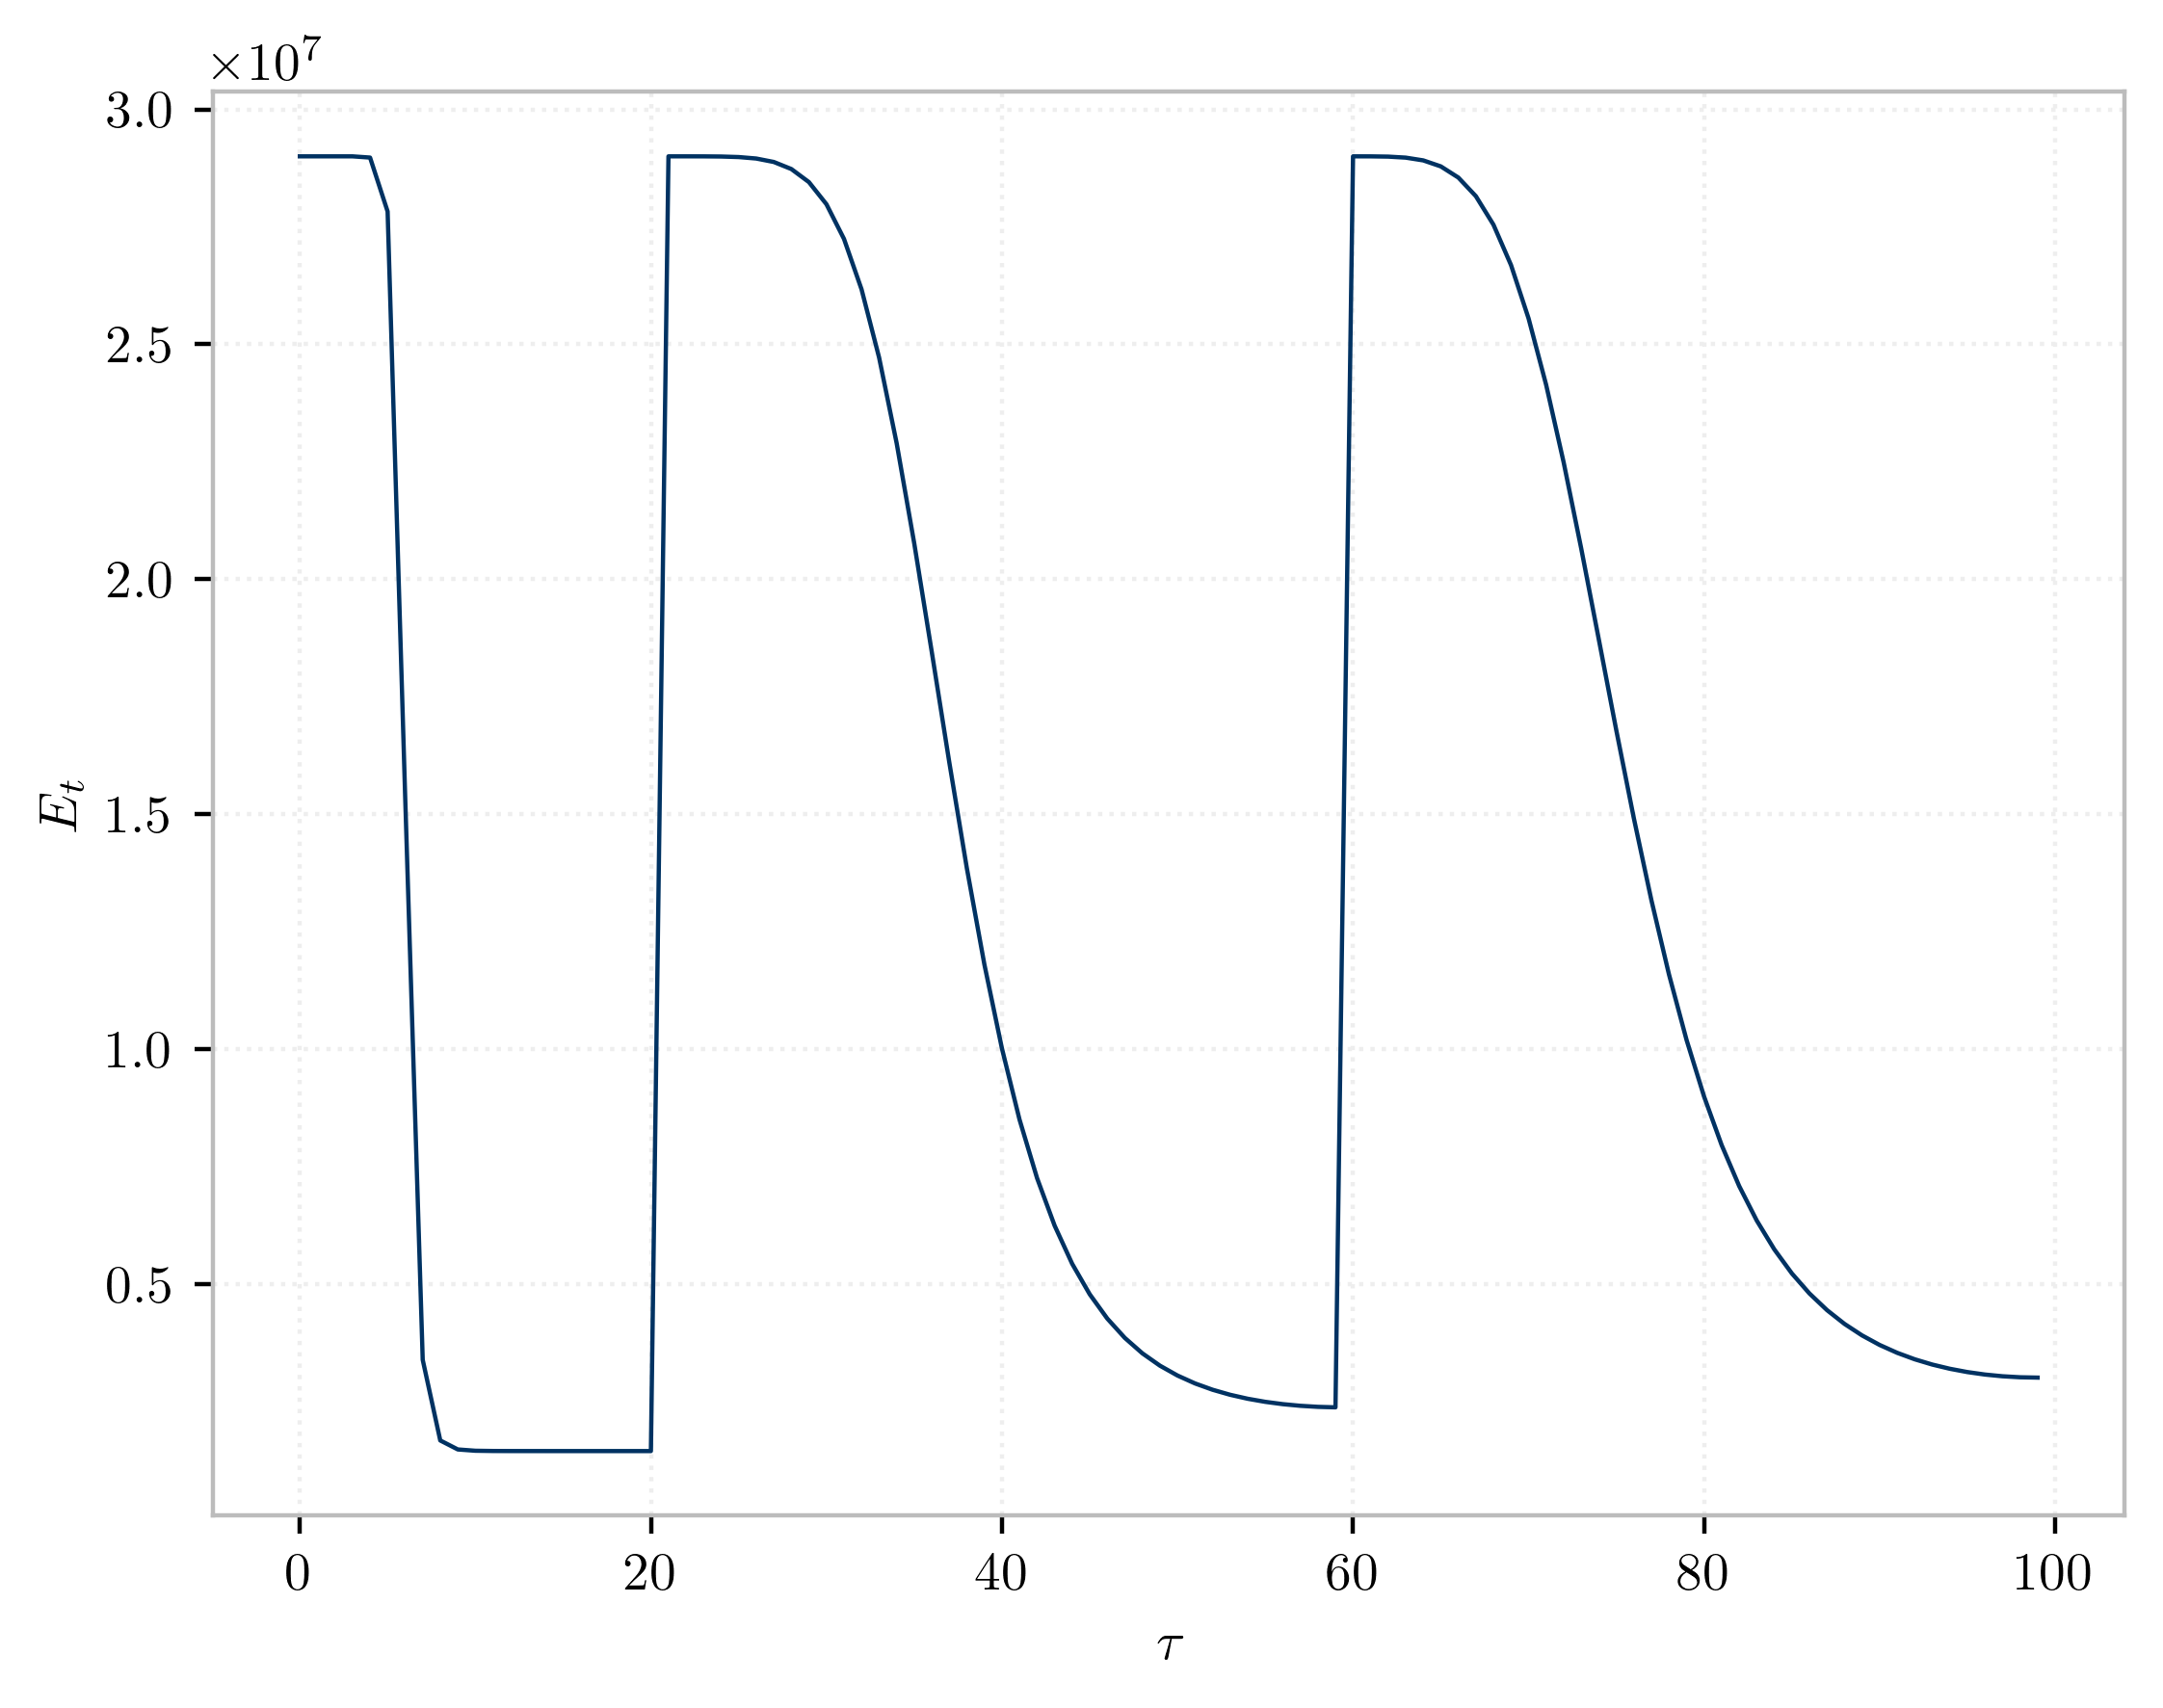

In [7]:
fig, ax = plt.subplots()
ax.plot(tangent)
ax.set_ylabel("$E_t$")
ax.set_xlabel(r"$\tau$");

RambergOsgoodSteel unaxial material - Written by R.Rahimi & R.Sepasdar & Dr. Mo. R. Banan Shiraz University Copyright 2012; 
Dodd_Restrepo unaxial material - Written by L.L. Dodd & J. Restepo

 The peak strain has been exceeded, REBAR FRACTURE!


 The peak strain has been exceeded, REBAR FRACTURE!


 The peak strain has been exceeded, REBAR FRACTURE!


 The peak strain has been exceeded, REBAR FRACTURE!


 The peak strain has been exceeded, REBAR FRACTURE!


 The peak strain has been exceeded, REBAR FRACTURE!


 The peak strain has been exceeded, REBAR FRACTURE!



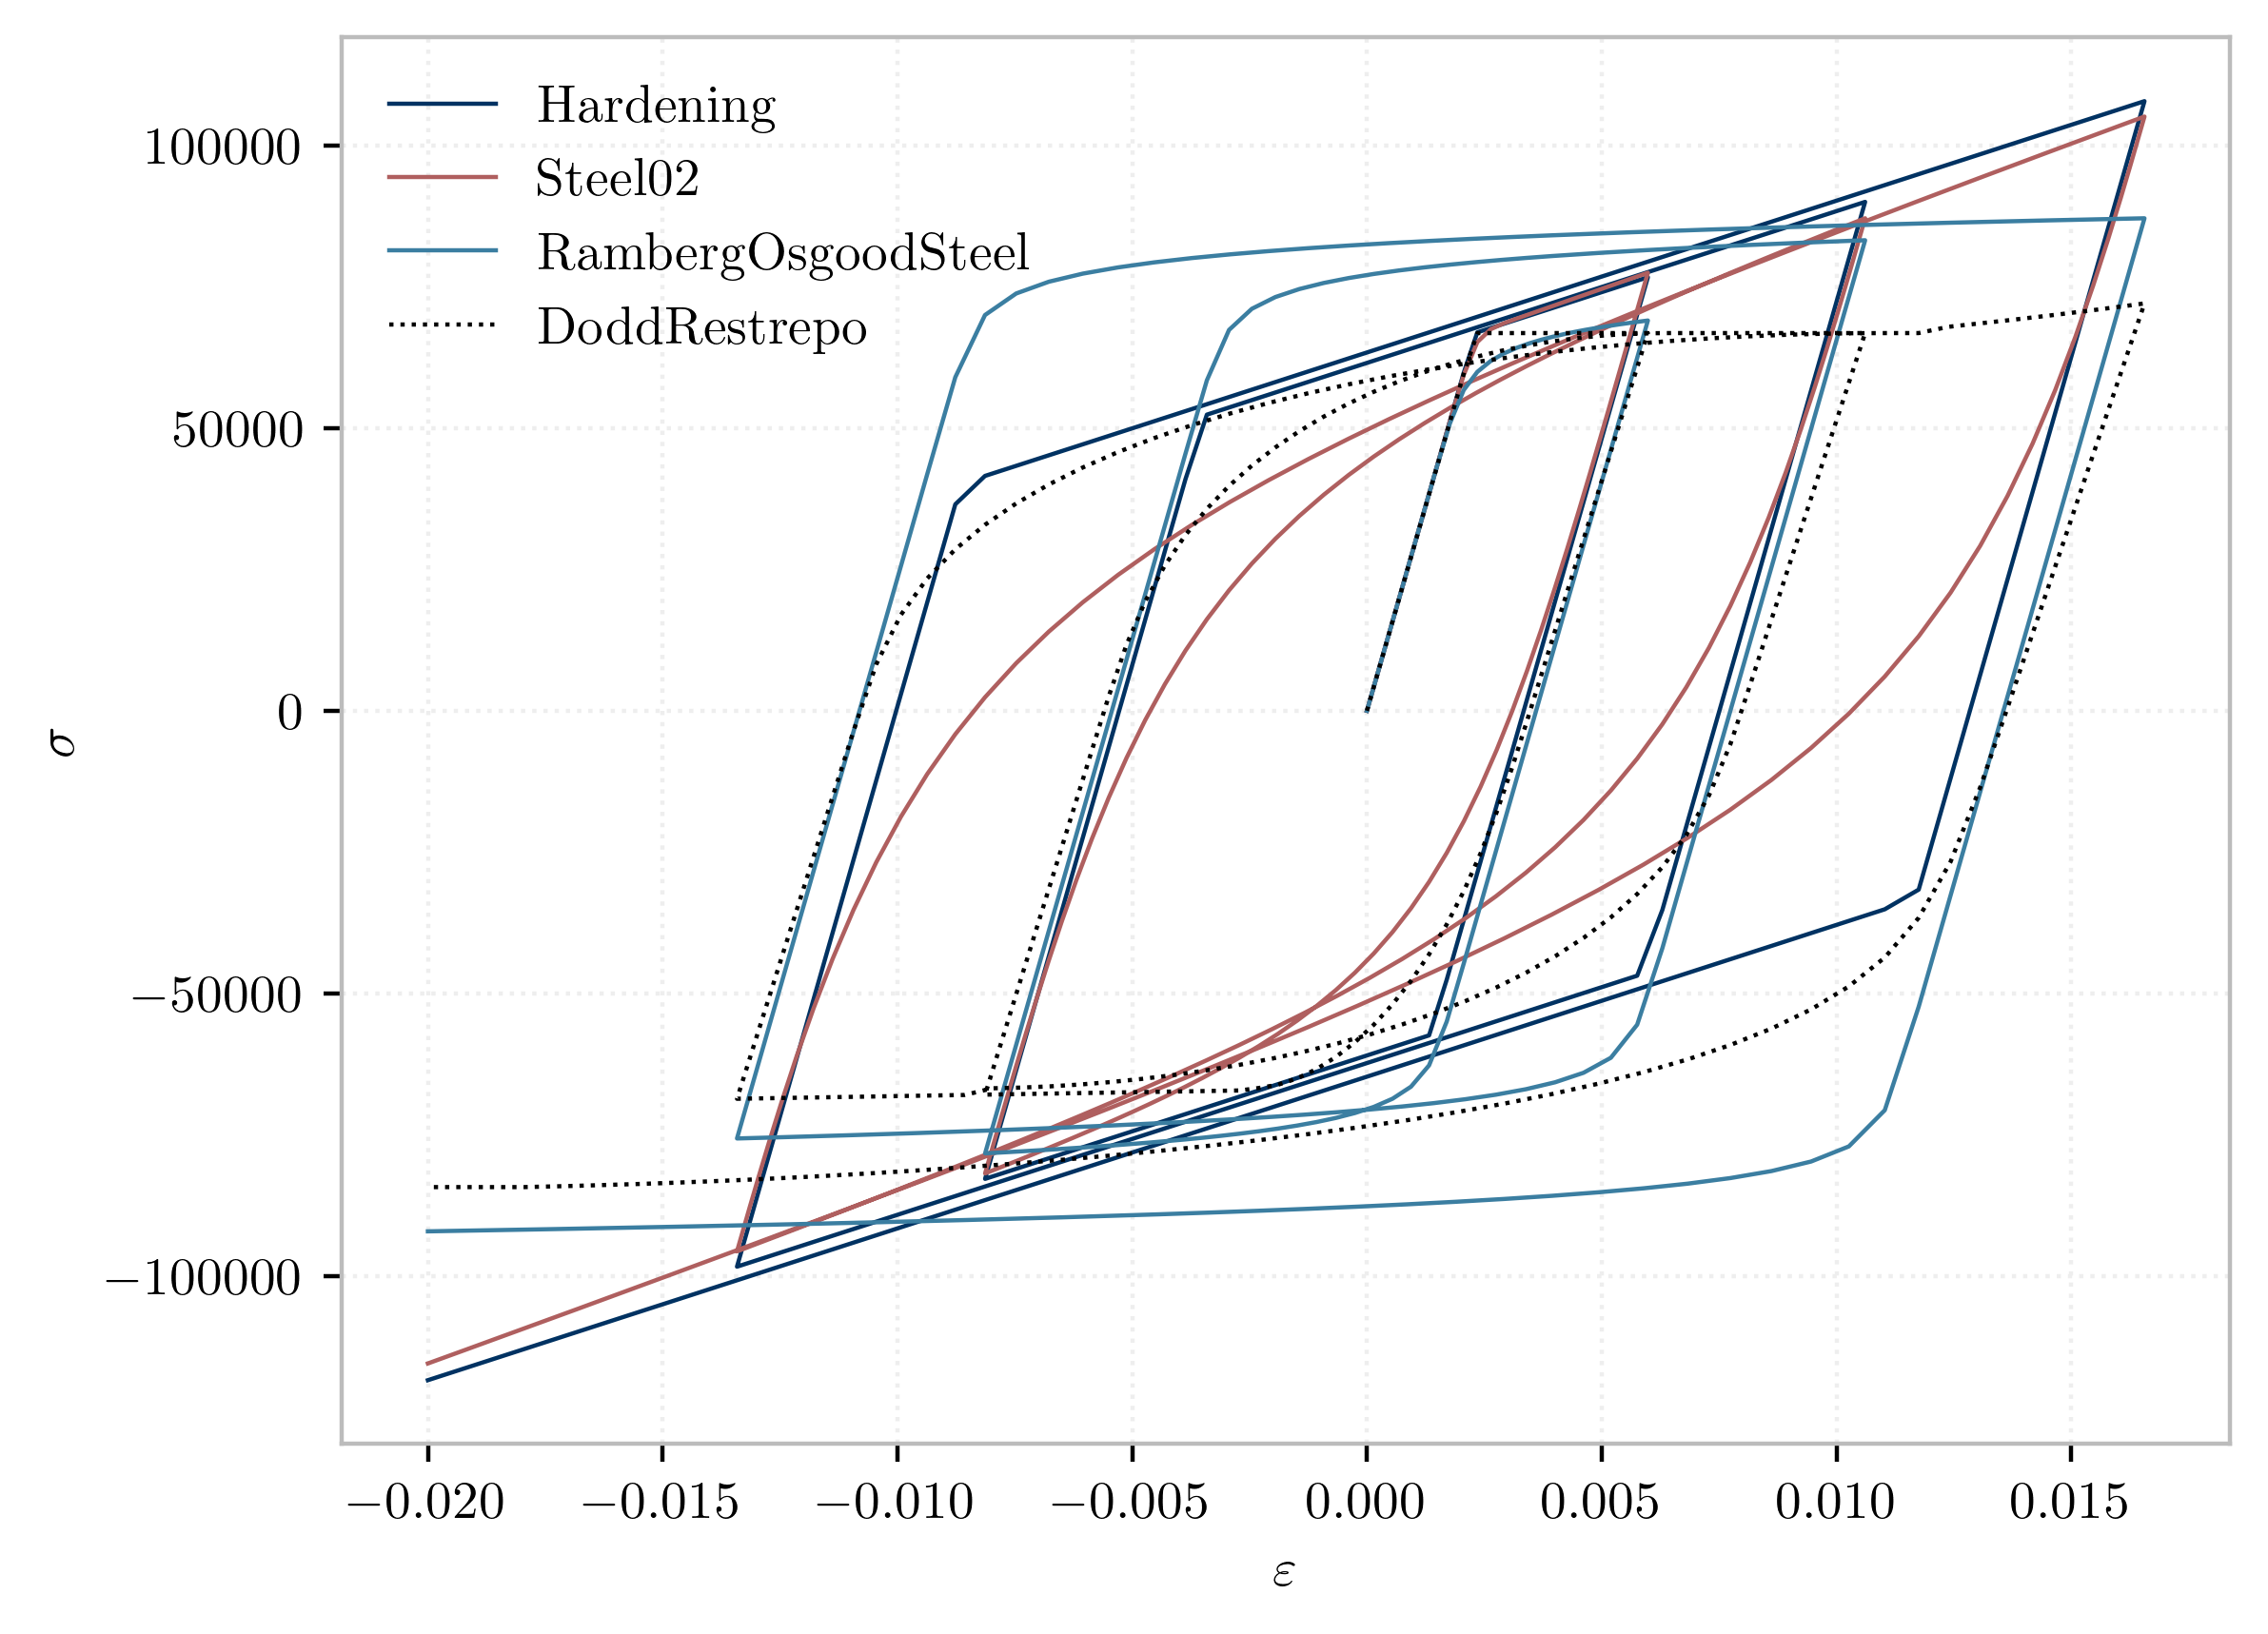

In [8]:
strain = 0.02*sin(linspace(0, 5.5*pi, 300))*linspace(0.5, 1, 300)**2

Bs = 0.1
fig, ax = plt.subplots()


with uniaxial.Hardening(Es, Fy, 0.002*Es, Bs*Es) as steel:
    ax.plot(strain, [steel.getStress(e, commit=True) for e in strain], label="Hardening")


with uniaxial.Steel02(Fy, Es, Bs, R0) as steel:
    ax.plot(strain, [steel.getStress(e, commit=True) for e in strain], label="Steel02")


with uniaxial.RambergOsgoodSteel(Fy, Es, 0.002, R0) as steel:
    ax.plot(strain, [steel.getStress(e, commit=True) for e in strain], label="RambergOsgoodSteel")


esh, esu = 10*Fy/Es, 14*Fy/Es
eshi = (esu + 5*esh)/5
with uniaxial.DoddRestrepo(Fy, 1.2*Fy, esh, esu, Es, eshi, 1.1*Fy) as steel:
    ax.plot(strain, [steel.getStress(e, commit=True) for e in strain], ":", label="DoddRestrepo")


# n = 11
# c = (Es/Fy)**(n)
# eta = [0.0*c, 1.*c]
# with uniaxial.BoucWen(Bs, 1., n, eta, [1, 0.0], [0.0, 0.0]) as m:
#     stress = [Es*m.getStress(e, commit=True) for e in strain]
#     ax.plot(strain, stress, "-.", label="BoucWen - GMP")

# eta = [0.5*c, 0.5*c]
# with uniaxial.BoucWen(Bs, 1., n, eta, [1, 0.0], [0.0, 0.0]) as m:
#     stress = [Es*m.getStress(e, commit=True) for e in strain]
#     ax.plot(strain, stress, "-.", label="BoucWen - Plastic")
    
# uniaxial.Bond_SP01(Fy, Sy=1.0, Fu=1.4*Fy, Su=, b=, R=)

ax.set_xlabel(r"$\varepsilon$")
ax.set_ylabel(r"$\sigma$")
ax.legend();

## Concrete

In [9]:
# nominal concrete compressive strength
fc = -8.5*ksi              # Concrete compressive strength ksi   (+Tension -Compression)
Ec = 57*ksi*sqrt(-fc/psi)  # Concrete Elastic Modulus

# unconfined concrete
fc1U = fc                  # unconfined concrete (todeschini parabolic model) maximum stress
eps1U = -0.003             # strain at maximum strength of unconfined concrete
fc2U = 0.2*fc1U            # ultimate stress
eps2U = -0.01              # strain at ultimate stress
_lambda = 0.1              # ratio between unloading slope at eps2 and initial slope Ec

# tensile-strength properties
ftU = -0.14*fc1U           # tensile strength +tension
Ets = ftU/0.002            # tension softening stiffness

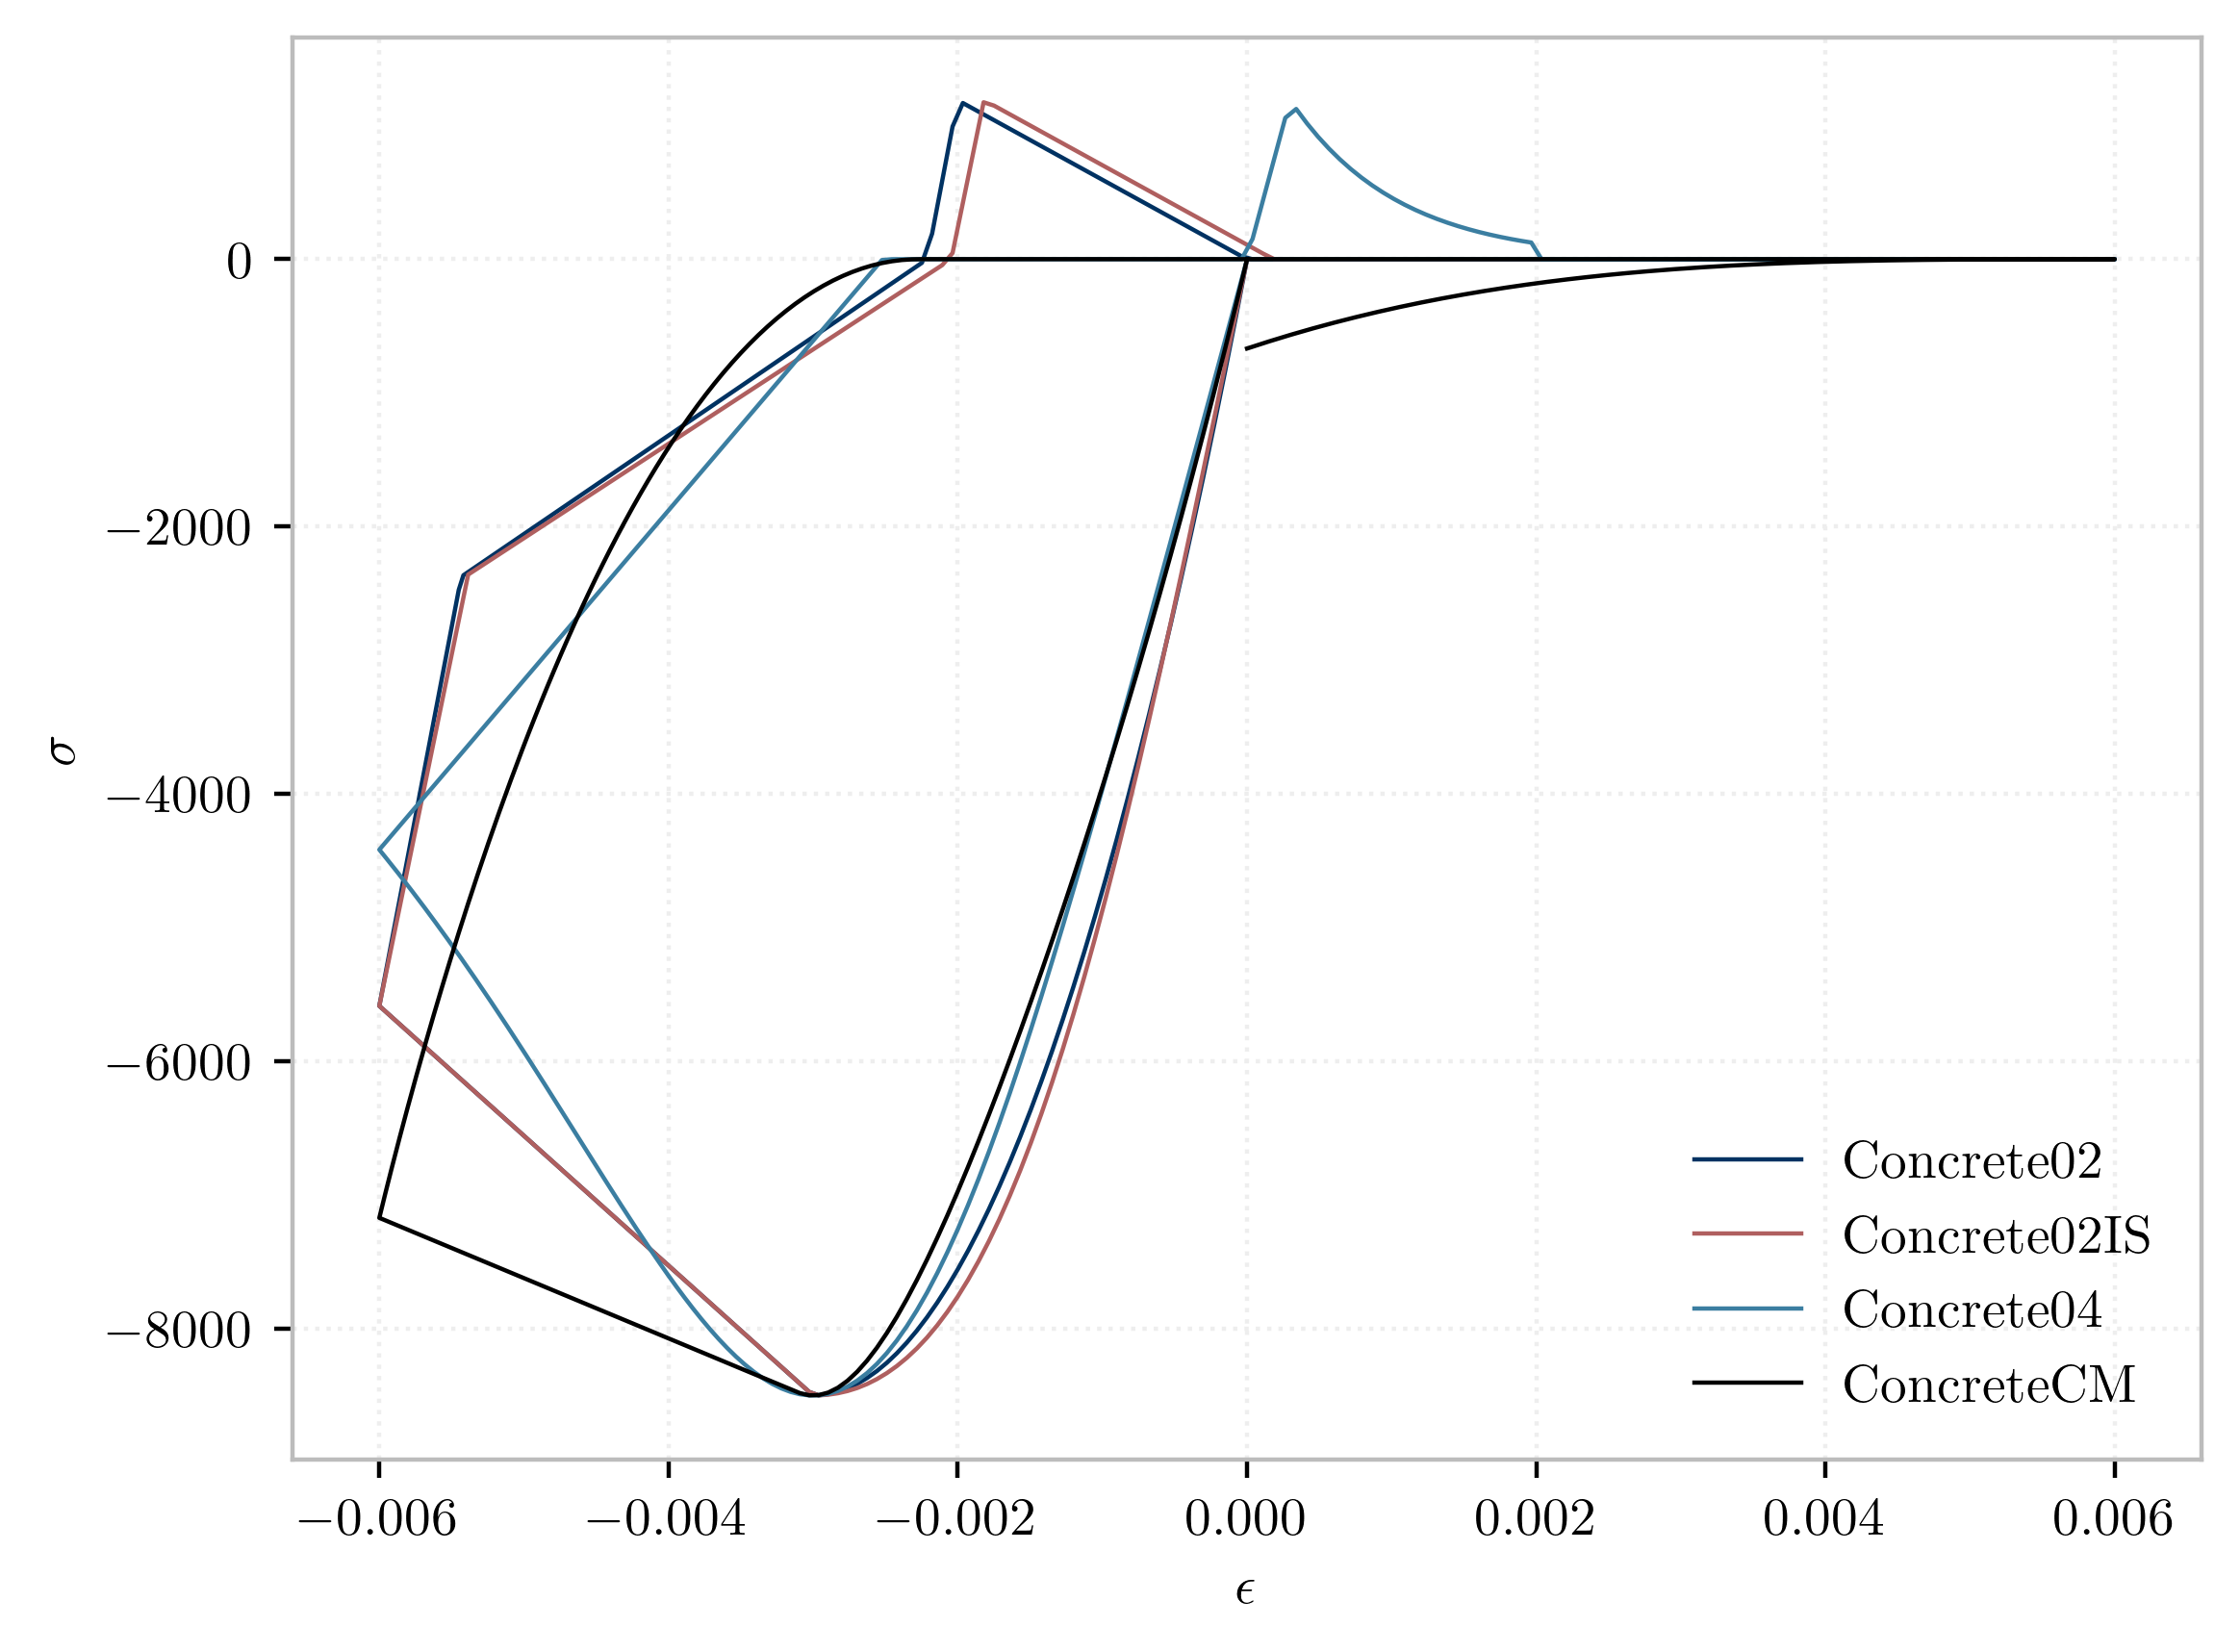

In [10]:
strain  = -0.006*sin(linspace(0, 2*pi, 500))
fig, ax = plt.subplots()

with uniaxial.Concrete02(fc1U, eps1U, fc2U, eps2U, _lambda, ftU, Ets) as c:
    ax.plot(strain, [c.getStress(e, commit=True) for e in strain], label="Concrete02")
    
with uniaxial.Concrete02IS(Ec, fc1U, eps1U, fc2U, eps2U, [_lambda, ftU, Ets]) as conc:
    ax.plot(strain, [conc.getStress(e, commit=True) for e in strain], label="Concrete02IS")

with uniaxial.Concrete04(fc1U, eps1U, eps2U, 4e3*ksi, [ftU, ftU/Ets]) as conc:
    ax.plot(strain, [conc.getStress(e, commit=True) for e in strain], label="Concrete04")

with uniaxial.ConcreteCM(fc1U, eps1U, 4500*ksi, 7, 1.035, 0.30, 0.00008, 1.2, 10000) as conc:
    ax.plot(strain, [conc.getStress(e, commit=True) for e in strain], label="ConcreteCM")

ax.legend()
ax.set_xlabel(r"$\epsilon$")
ax.set_ylabel(r"$\sigma$");

In [11]:
strain = 0.02*sin(linspace(0, 5.5*pi, 300))*linspace(0.5, 1, 300)**2

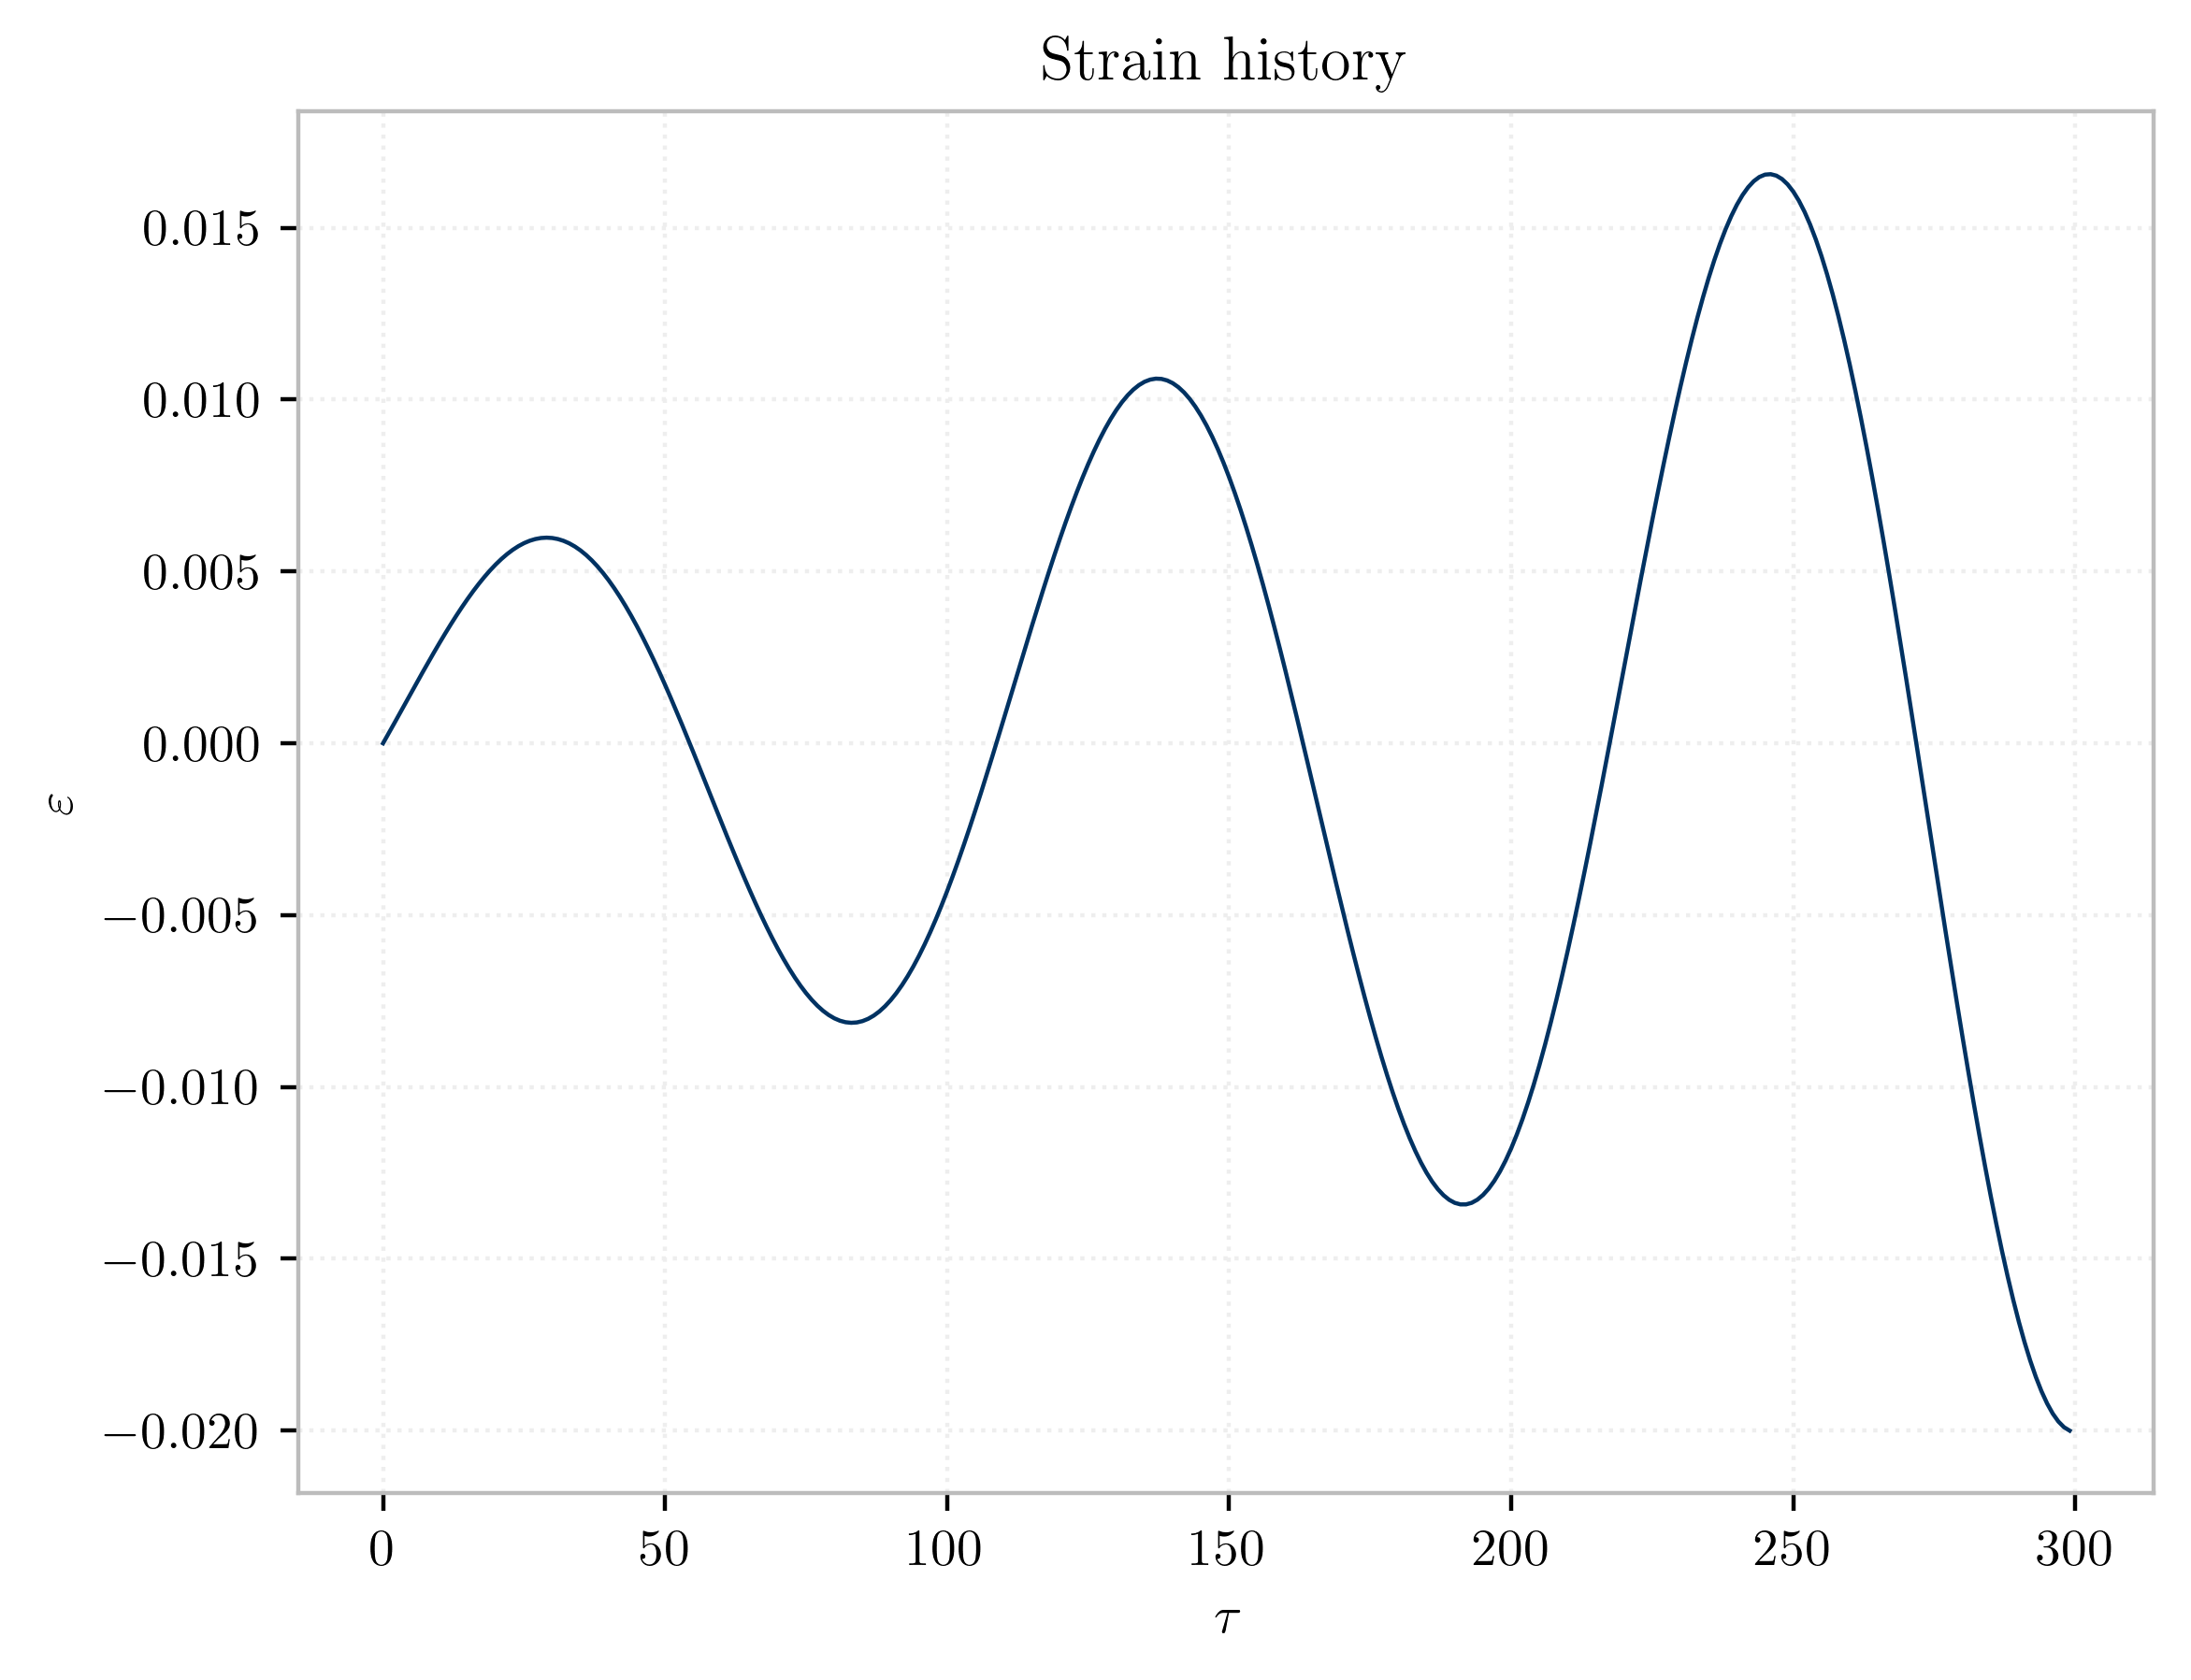

In [12]:
fig, ax = plt.subplots()
ax.plot(strain)
ax.set_xlabel(r"$\tau$")
ax.set_ylabel(r"$\varepsilon$")
ax.set_title("Strain history");

## Parallel Composition

### Bilinear Flag

In [15]:
mat_a = uniaxial.Hardening(15e3, fy=15., H_iso=0., H_kin=5e1, name=1)
mat_b = uniaxial.ElasticBilin(45e3, 1e2, 15/15e3, name=2)

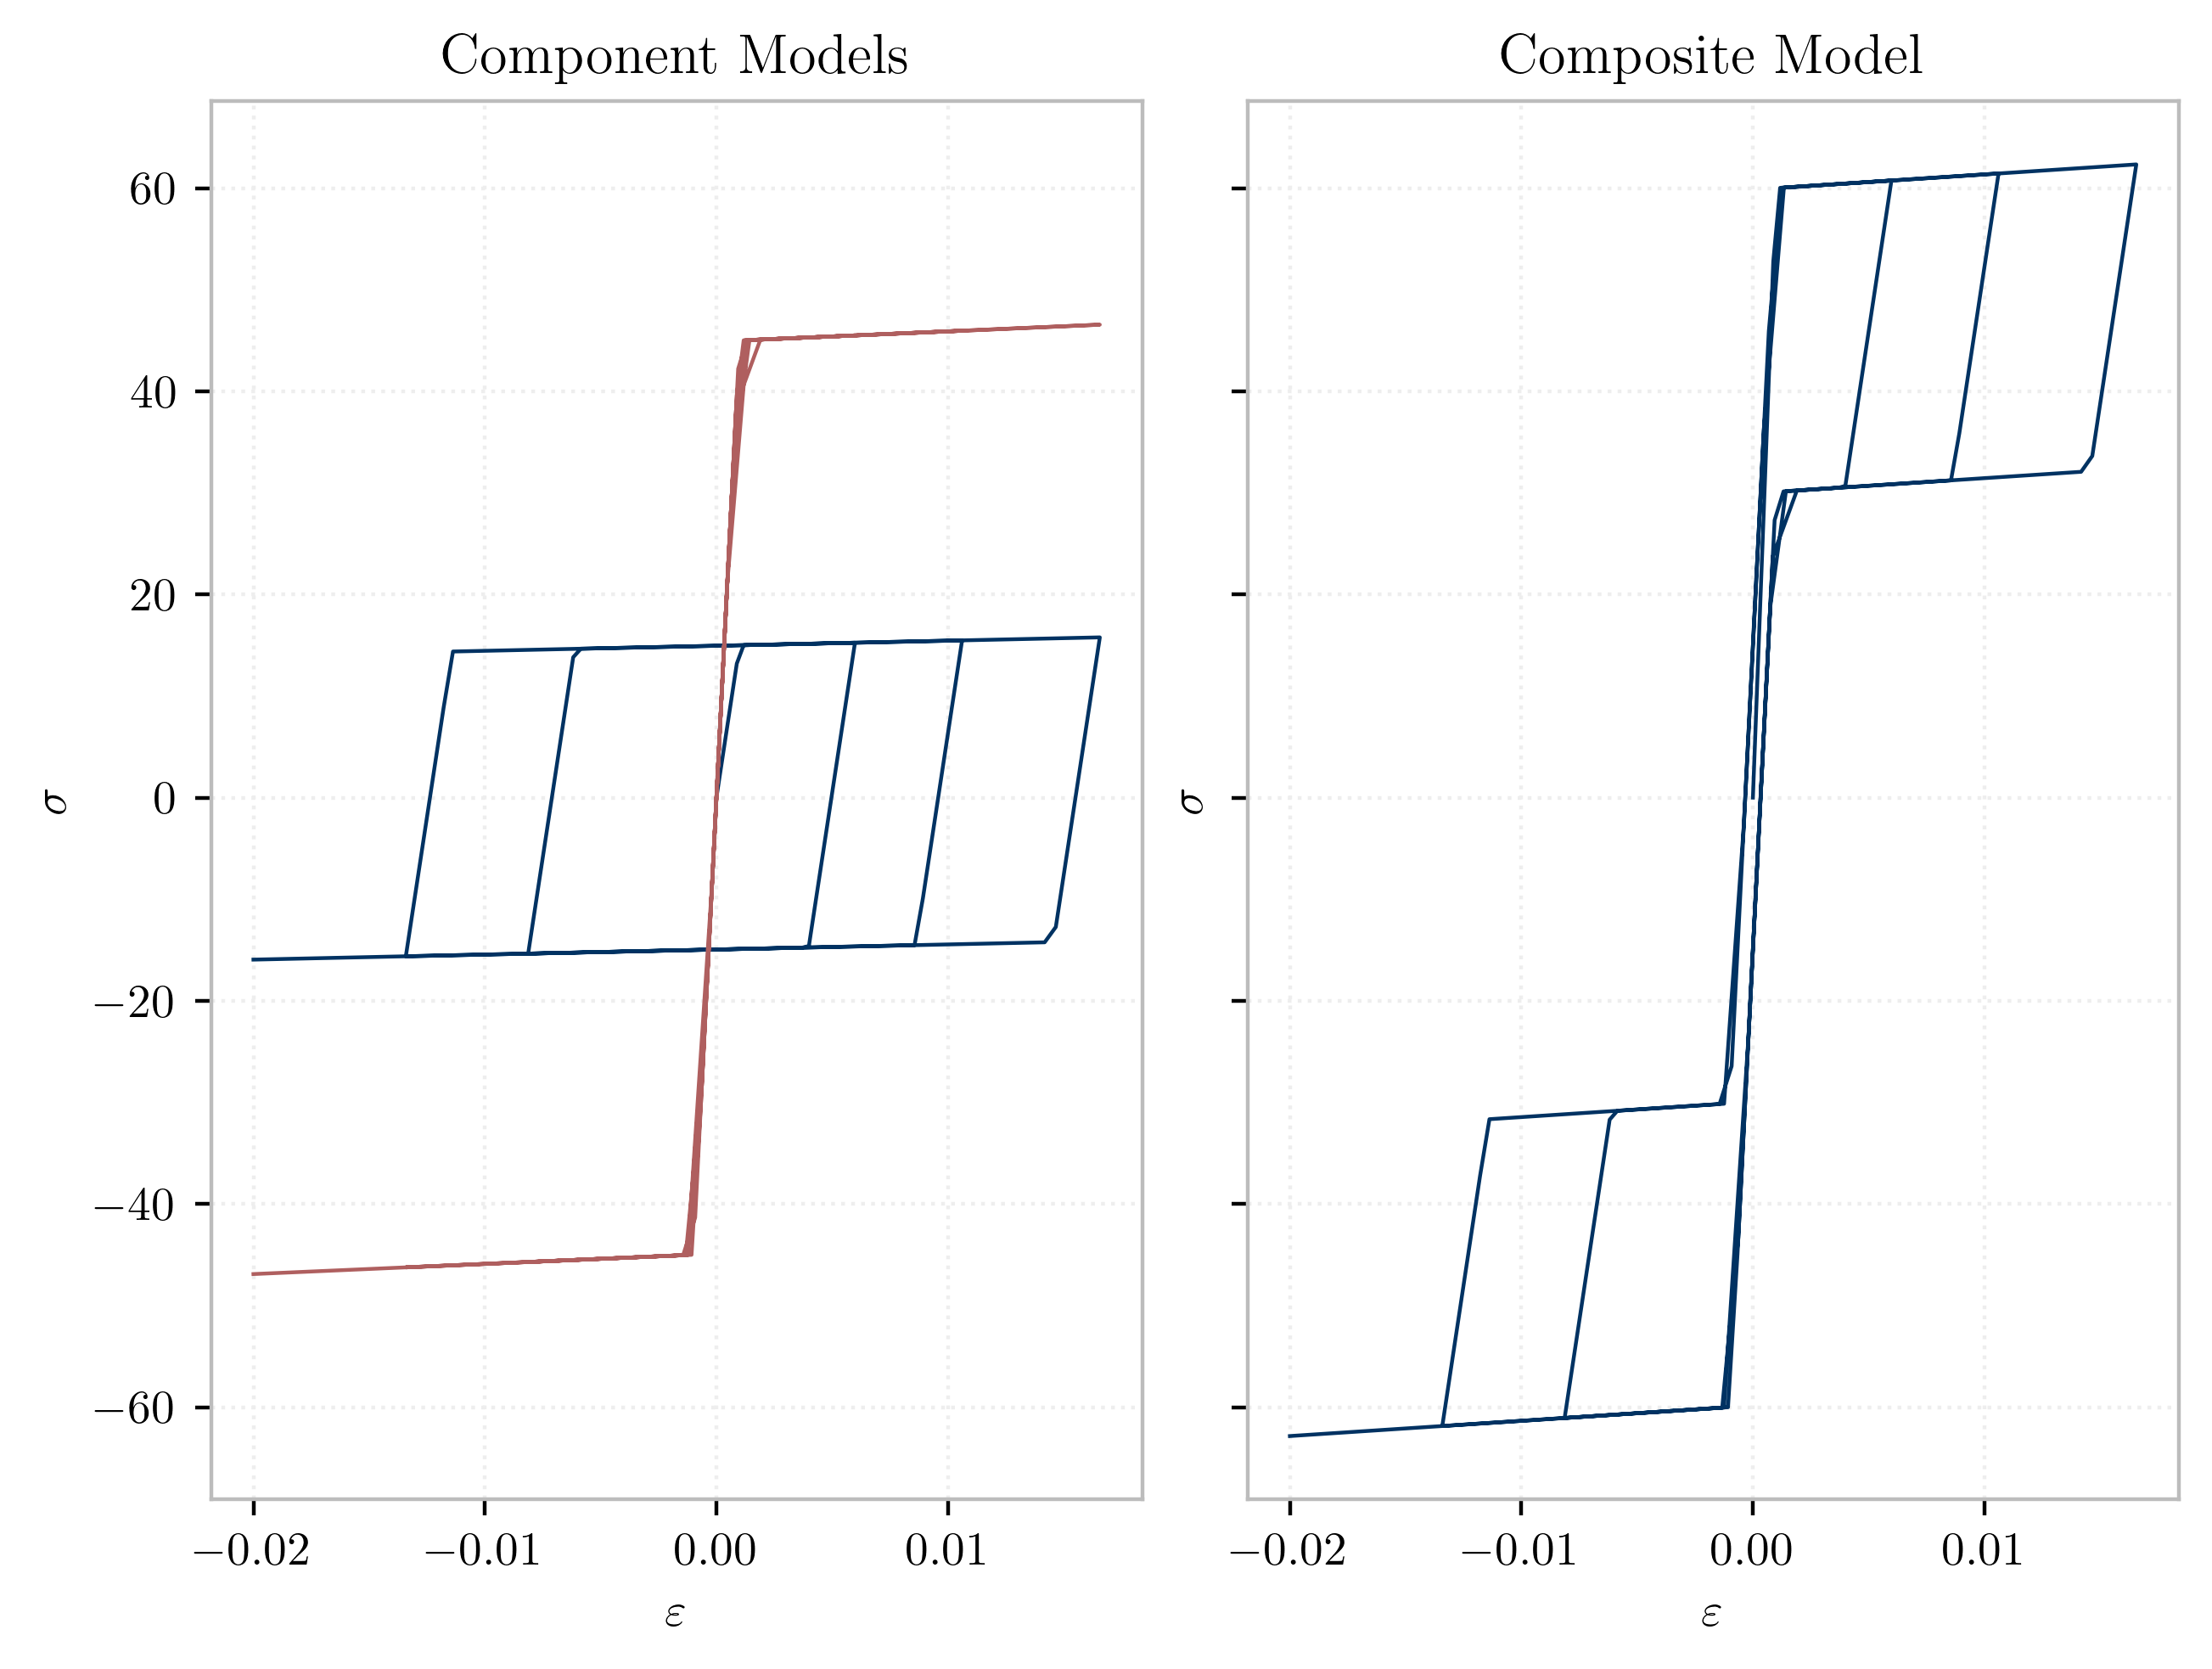

In [16]:
fig, ax = plt.subplots(1,2, sharey=True, constrained_layout=True)

with mat_a as m:
    ax[0].plot(strain, [m.getStress(e, commit=True) for e in strain])

with mat_b as m:
    ax[0].plot(strain, [m.getStress(e, commit=True) for e in strain])


# with mat_a as m:
#     ax[0].plot(strain, [m.getStress(e, commit=True) for e in strain])
with uniaxial.Parallel([mat_a, mat_b], name=3) as m:
    ax[1].plot(strain, [m.getStress(e, commit=True) for e in strain])


ax[0].set_title("Component Models")
ax[1].set_title("Composite Model")
for a in ax:
    a.set_xlabel(r"$\varepsilon$");
    a.set_ylabel(r"$\sigma$");

## Series Composition

### Brittle Fracture

### Trilinear Response

In [17]:
mat_a = uniaxial.Hardening(40e3, fy=40., H_iso=0., H_kin=5e3, name=1)
mat_b = uniaxial.Hardening(30e3, fy=60., H_iso=0., H_kin=5e2, name=2)

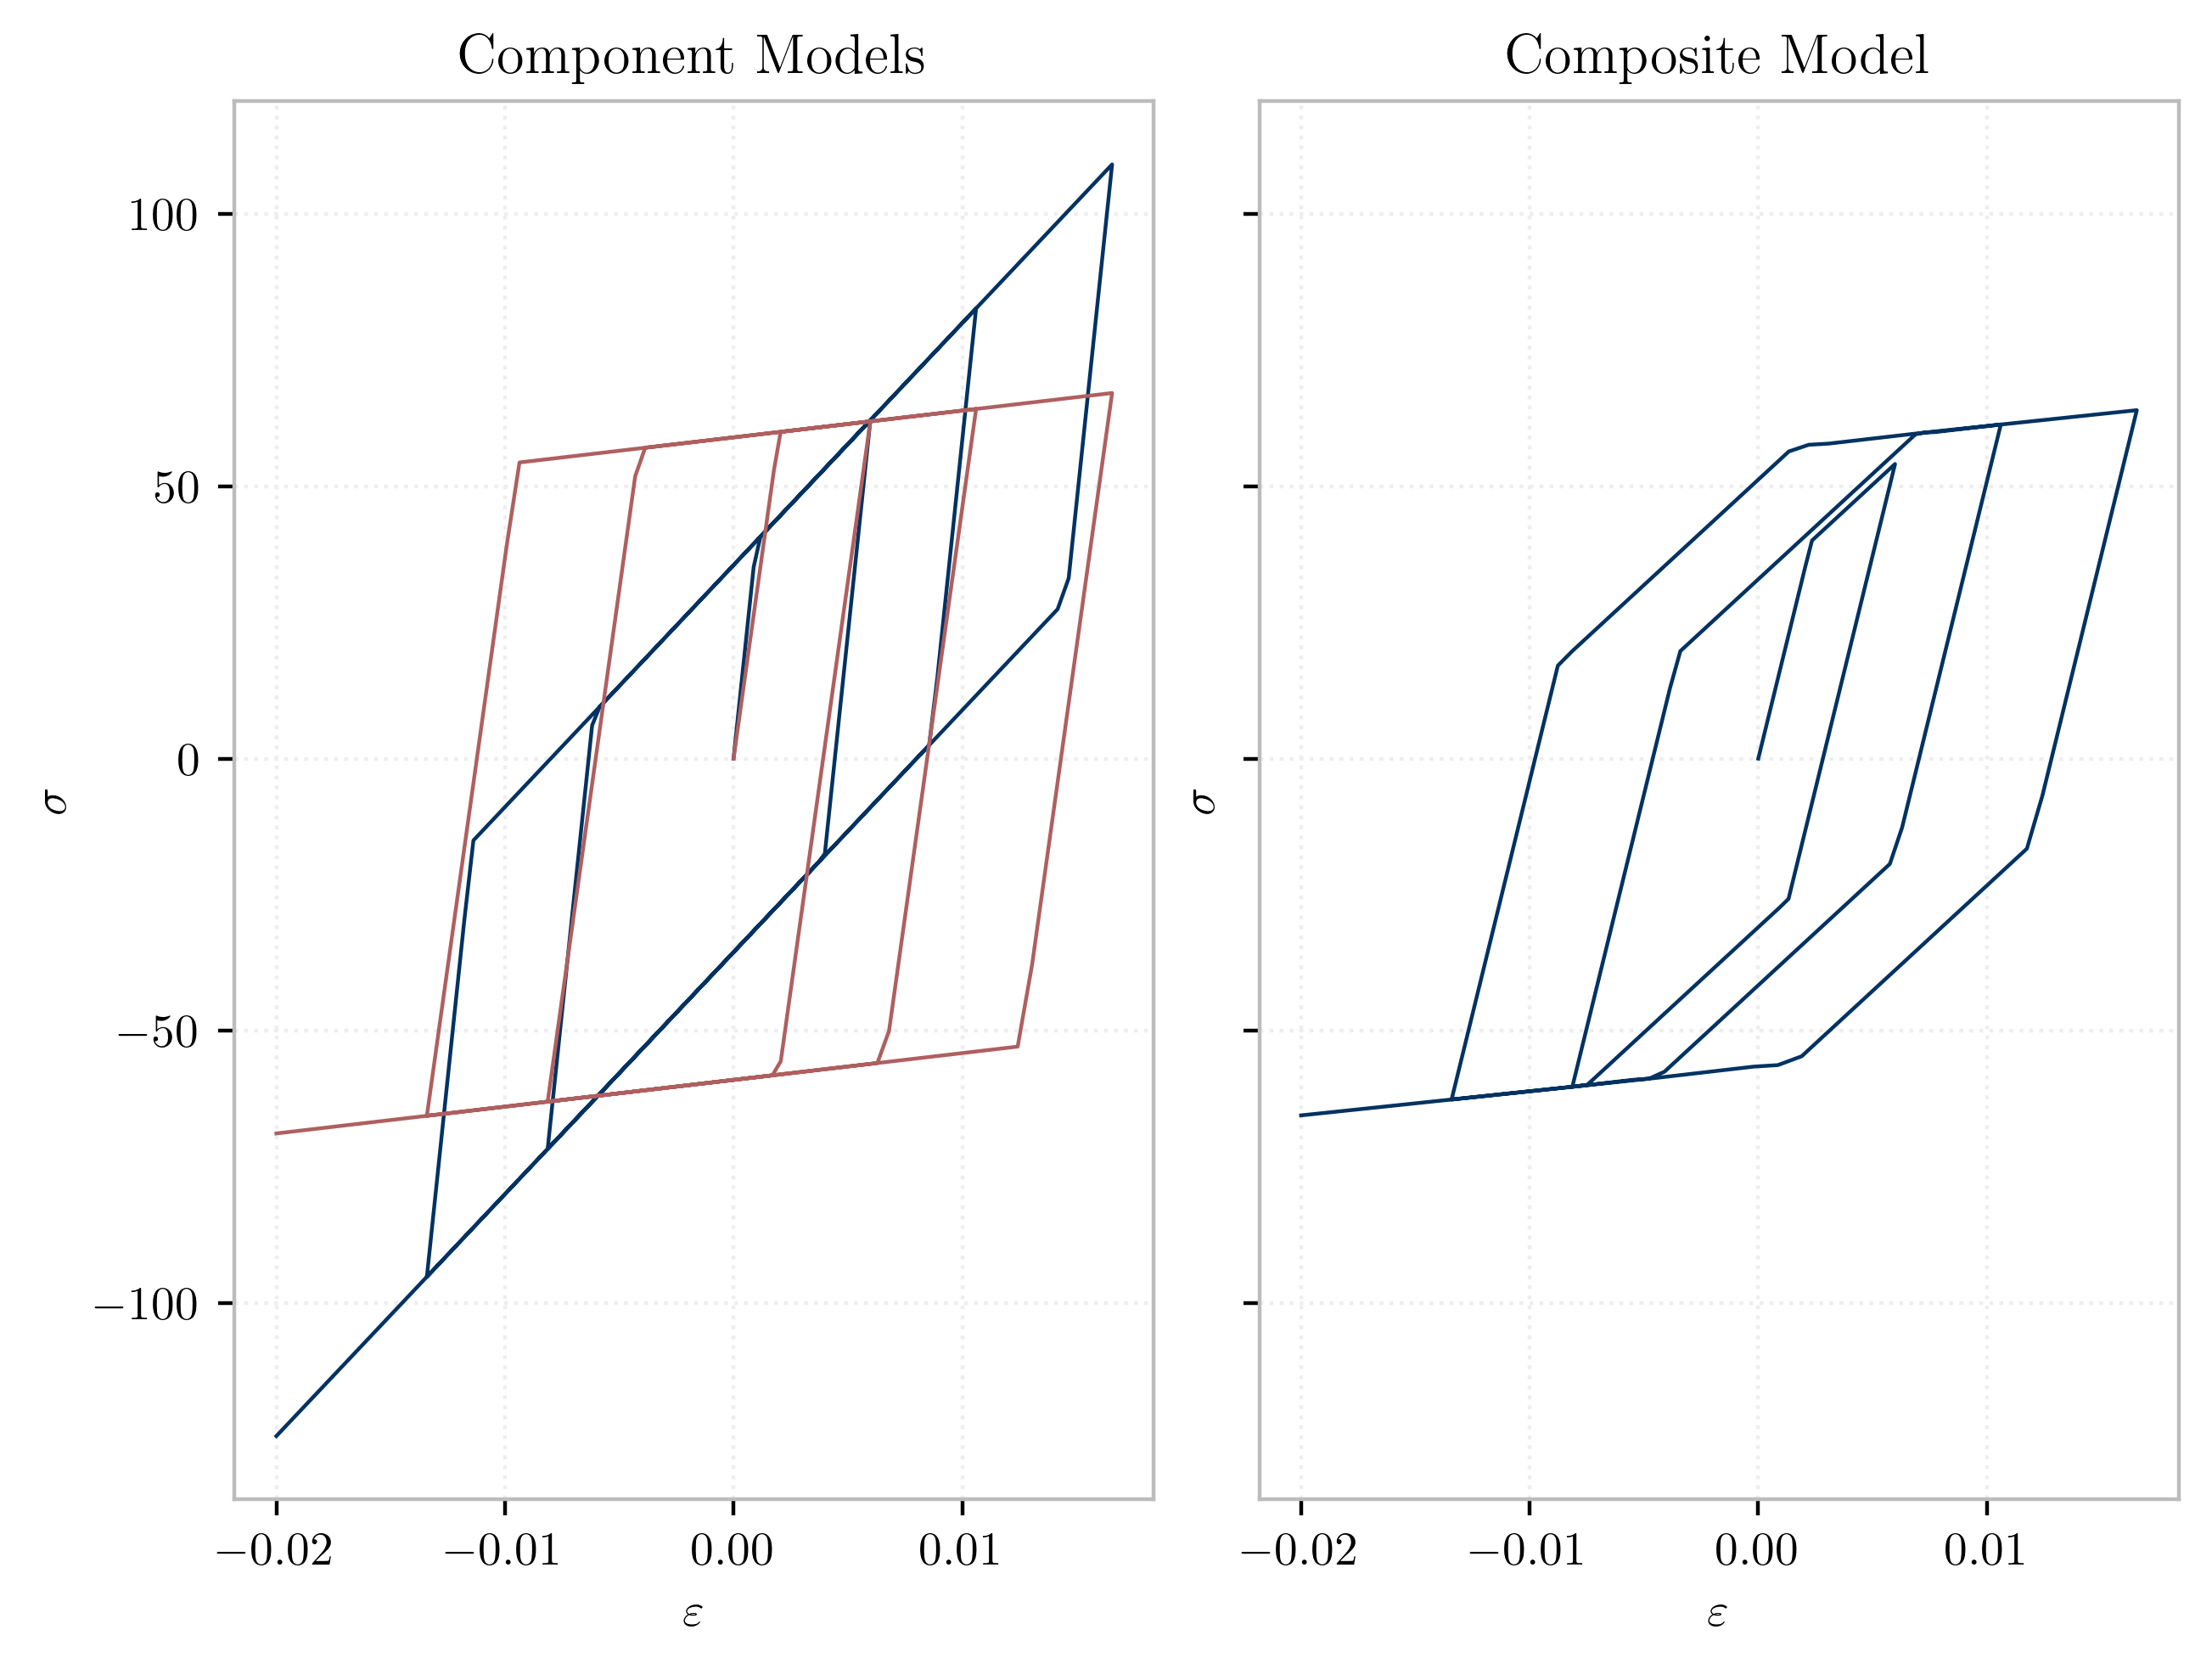

In [18]:
fig, ax = plt.subplots(1,2, sharey=True, constrained_layout=True)

with mat_a as m:
    ax[0].plot(strain, [m.getStress(e, commit=True) for e in strain])
    
with mat_b as m:
    ax[0].plot(strain, [m.getStress(e, commit=True) for e in strain])
    
with uniaxial.Series([mat_a, mat_b], name=3) as m:
    ax[1].plot(strain, [m.getStress(e, commit=True) for e in strain])

    
ax[0].set_title("Component Models")
ax[1].set_title("Composite Model")
for a in ax:
    a.set_xlabel(r"$\varepsilon$");
    a.set_ylabel(r"$\sigma$");

### Slipping

In [19]:
mat_a = uniaxial.Hardening(30e3, fy=60., H_iso=0., H_kin=1e2, name=1)
mat_b = uniaxial.ElasticBilin(10.0, 30e3, 0.01, name=2)

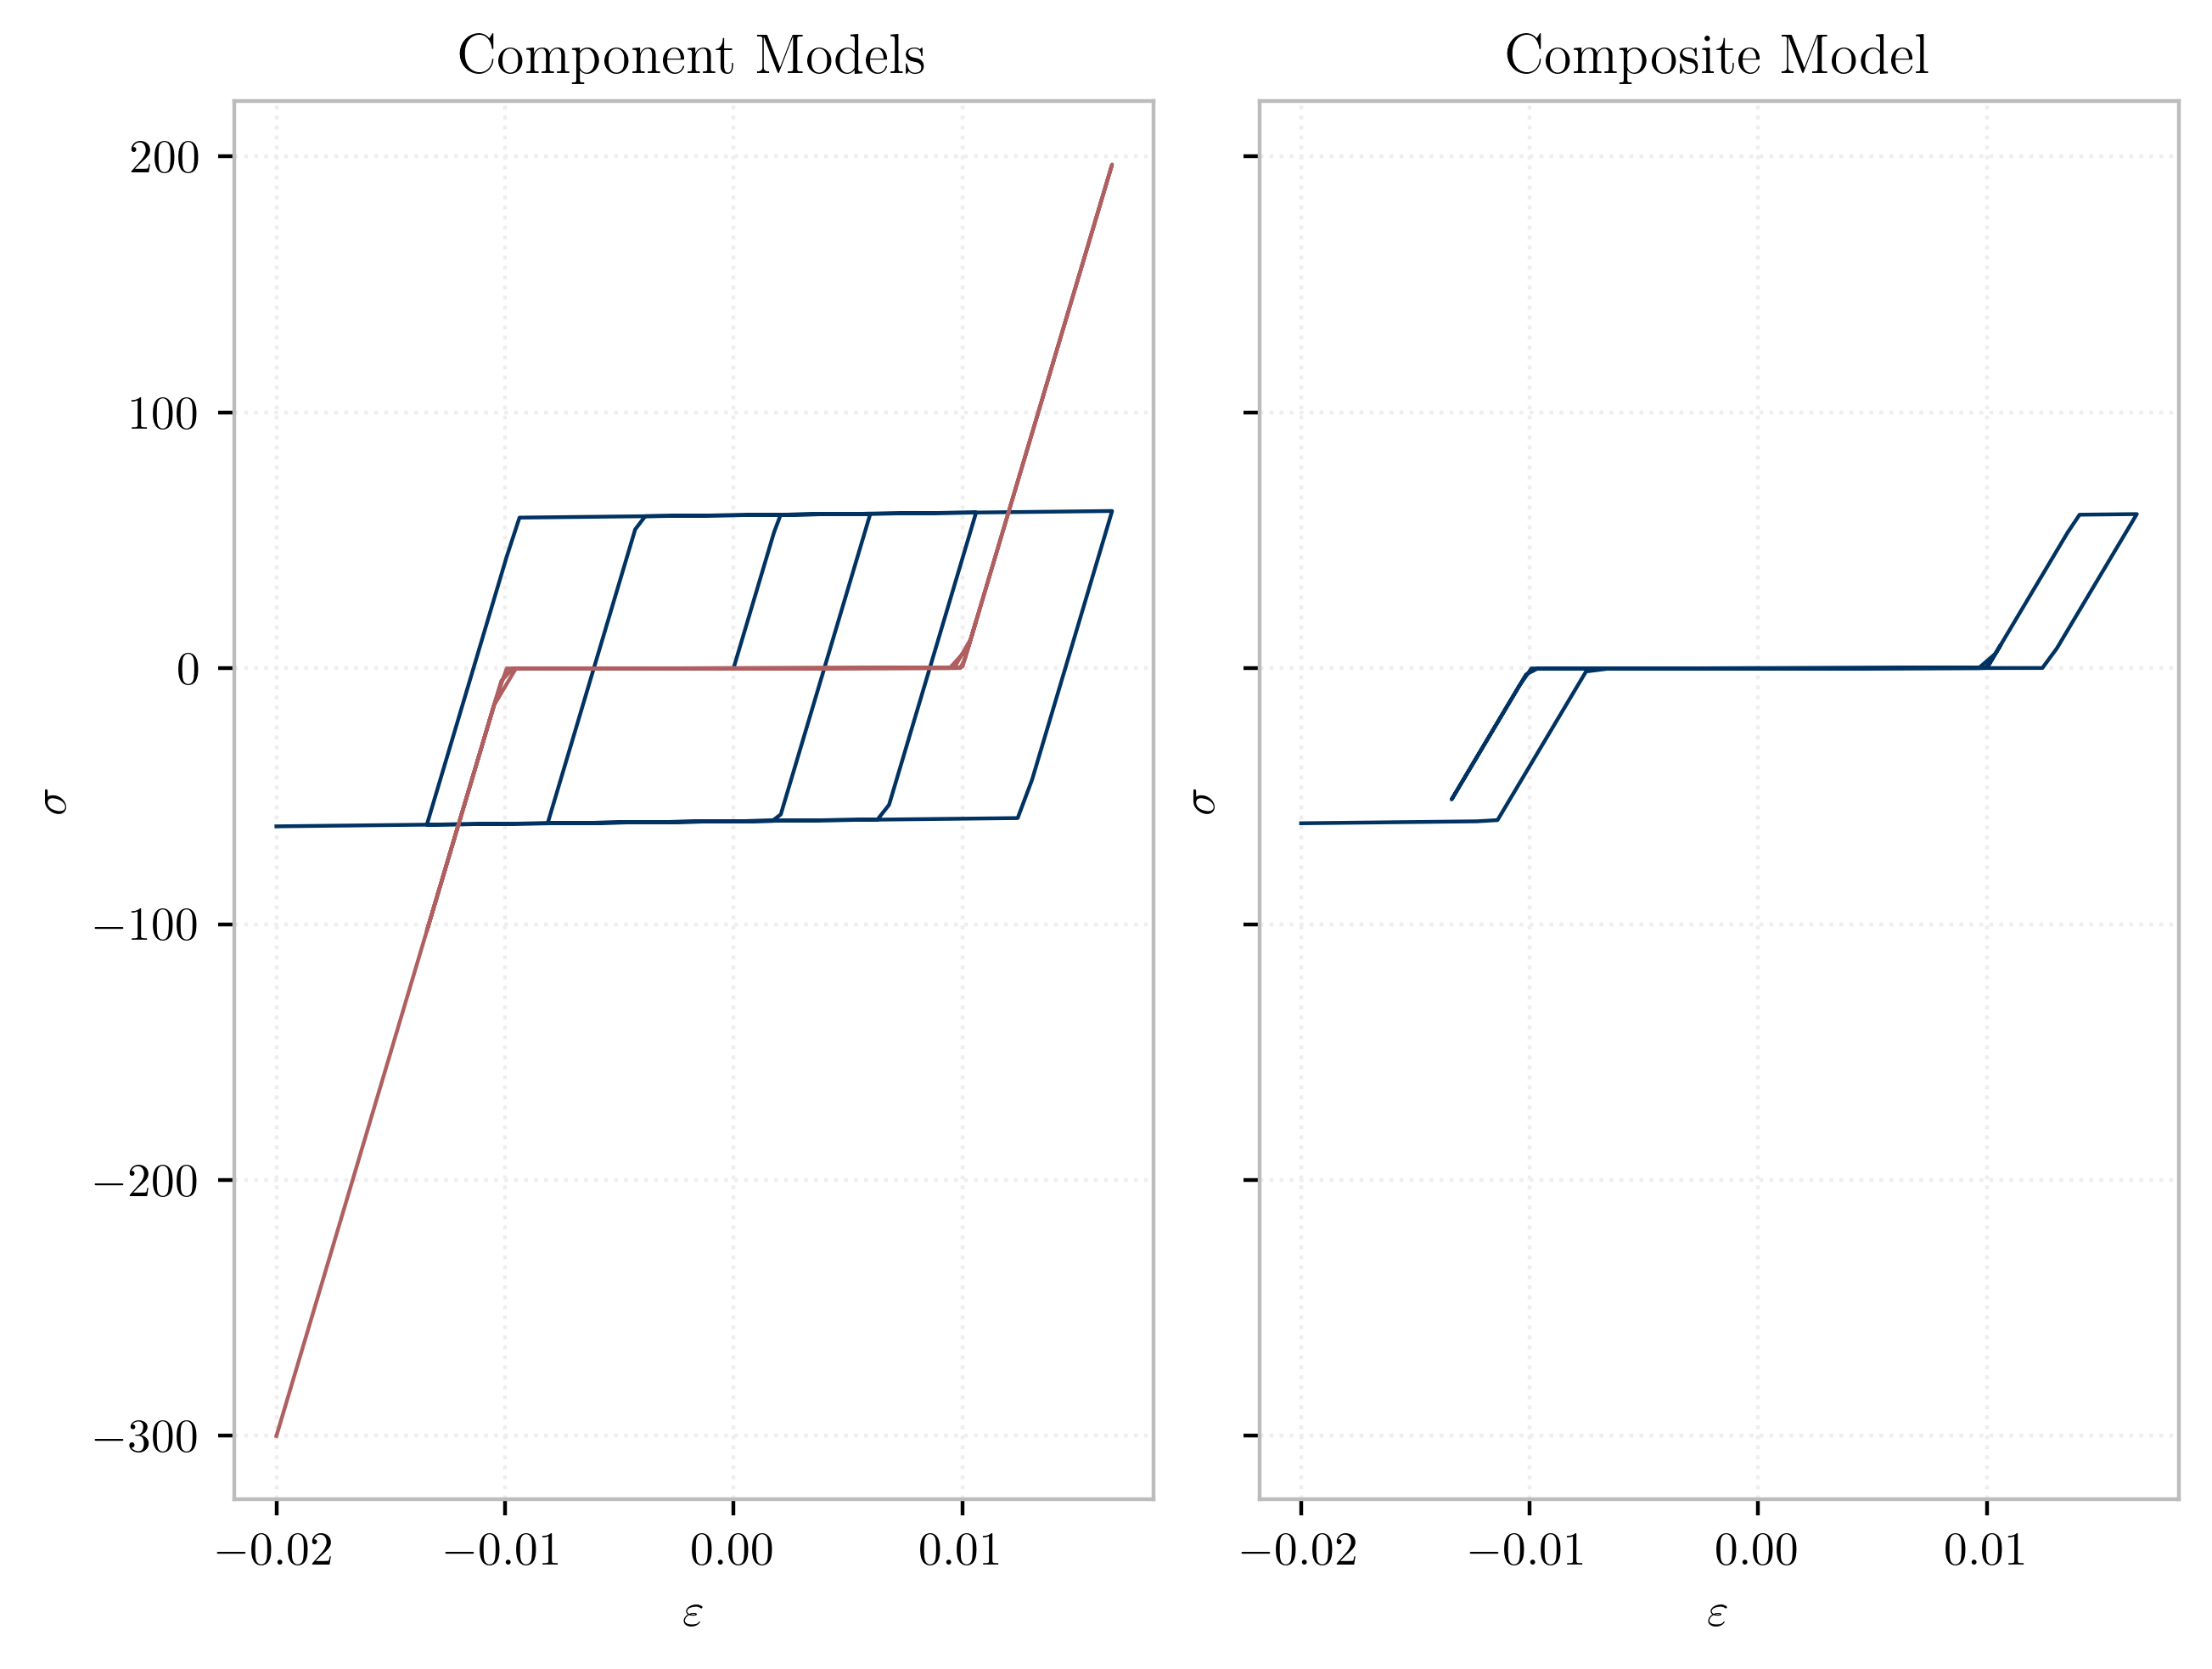

In [21]:
fig, ax = plt.subplots(1, 2, sharey=True, constrained_layout=True)

with mat_a as m:
    ax[0].plot(strain, [m.getStress(e, commit=True) for e in strain])
    
with mat_b as m:
    ax[0].plot(strain, [m.getStress(e, commit=True) for e in strain])

with uniaxial.Series([mat_a, mat_b], name=3) as m:
    ax[1].plot(strain, [m.getStress(e, commit=True) for e in strain])


ax[0].set_title("Component Models")
ax[1].set_title("Composite Model")
for a in ax:
    a.set_xlabel(r"$\varepsilon$");
    a.set_ylabel(r"$\sigma$");